<div style="
    background: url('https://images.unsplash.com/photo-1516900543503-6ee08d90b42d') center/cover no-repeat, linear-gradient(to right, rgba(255, 69, 0, 0.7), rgba(255, 165, 0, 0.7));
    padding: 30px;
    border-radius: 15px;
    text-align: center;
    color: white;
    box-shadow: 0 0 15px rgba(0, 0, 0, 0.5);
">

<h1 style="
        font-size: 50px;
        text-shadow: 0px 0px 15px rgba(255, 69, 0, 0.8), 0px 0px 5px rgba(255, 165, 0, 0.6);
        animation: flicker 1.5s infinite alternate;
    ">
        🔥 Fire Risk AI 🔥
    </h1>

<h2 style="
        font-size: 25px;
        text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);
        background: rgba(0, 0, 0, 0.5);
        display: inline-block;
        padding: 10px 20px;
        border-radius: 10px;
    ">
        Prediciendo el riesgo de incendios con inteligencia artificial para proteger nuestro futuro.
    </h2>

</div>

<style>
@keyframes flicker {
    0% { text-shadow: 0px 0px 15px rgba(255, 69, 0, 0.8), 0px 0px 5px rgba(255, 165, 0, 0.6); }
    100% { text-shadow: 0px 0px 25px rgba(255, 69, 0, 1), 0px 0px 10px rgba(255, 165, 0, 0.9); }
}
</style>

# Introducción

A través del análisis de un amplio y completo conjunto de datos que recoge todos los incendios forestales ocurridos en España entre 1968 y 2016, hemos revisado más de 585.000 eventos a través de 51 variables, incluyendo datos geográficos, ambientales y climáticos para extraer los factores críticos que contribuyen al Riesgo de Ignición en un Incendio Forestal.

Estamos seguros de que con el correcto desarrollo y escalado del modelo y sus características, este puede convertirse en una herramienta poderosa y maravillosa para las administraciones públicas en la monitorización, prevención y mitigación de desastres naturales como son los incendios forestales.

Por favor, sigue el link a nuestra web App: https://fireriskai.onrender.com/

------------------------------------------------------------------------------------------------------------------------

<h2 style="background-color: #FF4500; color: white; text-align: center; padding: 10px; border-radius: 10px;">
🔥 1. Limpieza de Datos y Preprocesamiento 🔥

<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p>
    En esta fase, se realiza la preparación inicial del conjunto de datos.

**IMPORTANTE:** Para ejecutar el código desde el principio, primero ELIMINAR el archivo 'incendios.csv de la carpeta csv.

<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p>

Comenzamos asegurando el acceso a la API de Kaggle, gestionando credenciales y descargando el dataset de Incendios Forestales en España, llamado 'wildfirespain' en un archivo comprimido .zip.

Posteriormente, se extraen los archivos necesarios y se verifica su correcta ubicación en el entorno de trabajo -> <b>SRC:</b>

In [2]:
import os
import subprocess
from shutil import copy2
#from kaggle.api.kaggle_api_extended import KaggleApi

# Step 1: Move (copy) the kaggle.json file to the correct location
src_path = '/workspaces/Machine-Learning-Final-Project.FGM/.devcontainer/kaggle.json'
dst_path = os.path.expanduser('~/.kaggle/kaggle.json')

# Ensure the .kaggle directory exists and copy the kaggle.json file
os.makedirs(os.path.dirname(dst_path), exist_ok=True)
copy2(src_path, dst_path)

# Set permissions for the kaggle.json file
os.chmod(dst_path, 0o600)

# Step 2: Download the dataset again using Kaggle API
#api = KaggleApi()
##api.authenticate()

# Define dataset info
dataset_name = 'patrilc/wildfirespain'
zip_file_path = '/workspaces/Machine-Learning-Final-Project.FGM/src/wildfirespain.zip'
output_dir = './'

# Download dataset
#api.dataset_download_files(dataset_name, path=output_dir, unzip=False)

# Step 3: Check if the zip file exists and extract it
if os.path.exists(zip_file_path):
    subprocess.run(['unzip', zip_file_path, '-d', output_dir], check=True)
    print(f"{zip_file_path} successfully extracted to {output_dir}")
else:
    print(f"{zip_file_path} does not exist in the specified path.")

# Step 4: List the contents of the current directory
directory_contents = os.listdir(output_dir)
print("Directory contents after extraction:")
for item in directory_contents:
    print(item)

Archive:  /workspaces/Machine-Learning-Final-Project.FGM/src/wildfirespain.zip
  inflating: ./incendios.csv         


/workspaces/Machine-Learning-Final-Project.FGM/src/wildfirespain.zip successfully extracted to ./
Directory contents after extraction:
workflow.csv
app.py
wildfirespain.zip
estructura_incendios_con_dtypes.xlsx
utils.py
explore.ipynb
incendios.csv


<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p>
A continuación, se carga el dataset en un DataFrame de Pandas, configurando su visualización para garantizar un análisis detallado de todas las variables.

- Incendios forestales ocurridos en España entre los años 1968 y 2016.
- Estudio realizado sobre un dataset formado por 585400 observaciones y 51 atributos.

In [ ]:
import pandas as pd

file_path = "/workspaces/Machine-Learning-Final-Project.FGM/src/incendios.csv"

incendios = pd.read_csv(file_path, delimiter=';')

pd.set_option('display.max_columns', None)

incendios


/tmp/ipykernel_585/1022687328.py:5: DtypeWarning: Columns (36,48) have mixed types. Specify dtype option on import or set low_memory=False.
  incendios = pd.read_csv(file_path, delimiter=';')


,idpif,anio,idestadopif,probabilidadignicion,idpeligro,idcomunidad,comunidad,idprovincia,provincia,idmunicipio,latitud,longitud,altitud,nummunicipiosafectados,puntosinicioincendio,deteccion,extinguido,horadeteccion,mesdeteccion,duracion,primeranotificaciondesde112,iddetectadopor,idgradoresponsabilidad,idcausa,idmotivacion,diastormenta,idinvestigacioncausa,idcertidumbrecausa,intencionalidad,idcausante,idautorizacionactividad,idclasedia,diasultimalluvia,tempmaxima,humrelativa,velocidadviento,direccionviento,perdidassuperficiales,idnivelgravedadmaximo,numeromediospersonal,numeromediospesados,numeromediosaereos,huso,x,y,iddatum,claseincendio,lugar,combustible,tipodefuego,tipodeataque
0,568679.0,2016,3,NaN,NaN,15,Islas Baleares,7,Islas Baleares,63,39.709,2.622,409.0,1,1.0,10/01/2016,10/01/2016,tarde,enero,0,VERDADERO,ccff_seguridad,2.0,290,NaN,0.0,1.0,2,supuesto_no_intencionado,2,4.0,festivo,0.0,17.0,49.0,20.0,Suroeste,0.20,0.0,20,18,0,31.0,466451.0,4397989.0,2.0,conato,excursionistas,bosques,superficie,directo
1,568680.0,2016,3,NaN,NaN,10,Aragon,22,Huesca,157,42.466,0.695,1213.0,1,1.0,12/01/2016,12/01/2016,tarde,enero,0,VERDADERO,ccff_seguridad,1.0,322,NaN,0.0,3.0,1,no_intencionado,1,3.0,laborable,2.0,8.0,0.0,0.0,Norte,0.05,0.0,4,0,0,30.0,800159.0,4713460.0,2.0,conato,vertederos,pas_mat,superficie,directo
2,568681.0,2016,3,NaN,NaN,10,Aragon,22,Huesca,125,42.141,-0.408,483.0,1,1.0,17/01/2016,17/01/2016,tarde,enero,0,VERDADERO,ccff_seguridad,2.0,241,NaN,0.0,3.0,1,no_intencionado,1,4.0,festivo,3.0,8.0,40.0,4.0,Noreste,0.23,0.0,9,4,0,30.0,714747.0,4675882.0,2.0,conato,NaN,pastizal,superficie,directo
3,568682.0,2016,3,NaN,NaN,10,Aragon,22,Huesca,52,41.689,0.178,196.0,1,1.0,17/01/2016,17/01/2016,tarde,enero,0,VERDADERO,ccff_seguridad,2.0,212,NaN,0.0,3.0,2,supuesto_no_intencionado,2,4.0,festivo,0.0,0.0,0.0,0.0,Norte,0.65,0.0,8,4,0,NaN,NaN,NaN,NaN,conato,viasferreas,pas_mat,superficie,directo
4,568683.0,2016,3,NaN,NaN,10,Aragon,22,Huesca,197,41.866,-0.461,399.0,1,1.0,22/01/2016,22/01/2016,tarde,enero,0,VERDADERO,ccff_seguridad,2.0,212,NaN,0.0,3.0,1,no_intencionado,2,4.0,laborable,0.0,0.0,0.0,0.0,Norte,0.15,0.0,7,3,0,NaN,NaN,NaN,NaN,conato,viasferreas,pas_mat,superficie,directo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585394,1240141.0,2016,3,NaN,NaN,11,Castilla La Mancha,16,Cuenca,249,39.729,-2.928,775.0,1,1.0,06/10/2016,06/10/2016,tarde,octubre,0,VERDADERO,vigilante_fijo,1.0,210,NaN,0.0,3.0,2,supuesto_no_intencionado,2,3.0,laborable,0.0,0.0,0.0,0.0,Norte,7.95,0.0,1,0,0,NaN,NaN,NaN,NaN,incendio,viasferreas,pastizal,superficie,directo
585395,1240142.0,2016,3,NaN,NaN,11,Castilla La Mancha,16,Cuenca,128,39.569,-2.762,735.0,1,1.0,03/10/2016,04/10/2016,noche,octubre,1,VERDADERO,vigilante_fijo,3.0,400,401.0,0.0,3.0,2,supuesto_intencionado,2,4.0,laborable,0.0,0.0,0.0,0.0,Norte,1.58,0.0,3,2,0,NaN,NaN,NaN,NaN,incendio,otros,pas_res,superficie,directo
585396,1240144.0,2016,3,NaN,NaN,11,Castilla La Mancha,16,Cuenca,102,39.612,-2.281,815.0,1,1.0,03/10/2016,04/10/2016,tarde,octubre,1,VERDADERO,vigilante_fijo,1.0,210,NaN,0.0,3.0,2,supuesto_no_intencionado,2,3.0,laborable,0.0,0.0,0.0,0.0,Norte,4.10,0.0,3,2,0,NaN,NaN,NaN,NaN,incendio,otros,mat_res,superficie,directo
585397,1240145.0,2016,3,NaN,NaN,11,Castilla La Mancha,16,Cuenca,153,39.485,-2.745,716.0,1,1.0,03/10/2016,03/10/2016,tarde,octubre,0,FALSO,base_cdf,3.0,400,401.0,0.0,3.0,2,supuesto_intencionado,2,4.0,laborable,0.0,0.0,0.0,0.0,Norte,0.86,0.0,4,2,0,NaN,NaN,NaN,NaN,conato,otros,pas_mat,superficie,directo


<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p> 
 
 Se realiza una primera inspección de la estructura de los datos mediante <code>info()</code> y <code>describe()</code>, obteniendo información clave sobre los tipos de datos, valores faltantes y estadísticas descriptivas.

In [4]:
# Get basic info about the dataset
incendios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585399 entries, 0 to 585398
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   idpif                        585399 non-null  float64
 1   anio                         585399 non-null  int64  
 2   idestadopif                  585399 non-null  int64  
 3   probabilidadignicion         489389 non-null  float64
 4   idpeligro                    579862 non-null  float64
 5   idcomunidad                  585399 non-null  int64  
 6   comunidad                    585399 non-null  object 
 7   idprovincia                  585399 non-null  int64  
 8   provincia                    585399 non-null  object 
 9   idmunicipio                  585399 non-null  int64  
 10  latitud                      514051 non-null  float64
 11  longitud                     514051 non-null  float64
 12  altitud                      514051 non-null  float64
 13 

In [5]:
# Summary statistics
incendios.describe()

,idpif,anio,idestadopif,probabilidadignicion,idpeligro,idcomunidad,idprovincia,idmunicipio,latitud,longitud,altitud,nummunicipiosafectados,puntosinicioincendio,duracion,idgradoresponsabilidad,idcausa,idmotivacion,diastormenta,idinvestigacioncausa,idcertidumbrecausa,idcausante,idautorizacionactividad,diasultimalluvia,tempmaxima,humrelativa,velocidadviento,perdidassuperficiales,idnivelgravedadmaximo,numeromediospersonal,numeromediospesados,numeromediosaereos,huso,x,y,iddatum
count,5.853990e+05,585399.000000,585399.000000,489389.000000,579862.000000,585399.000000,585399.000000,585399.000000,514051.000000,514051.000000,514051.000000,585399.000000,6414.000000,585399.000000,6414.000000,585399.000000,302248.000000,9262.000000,6414.000000,585399.000000,585399.000000,6414.000000,206416.000000,282064.000000,277034.000000,262184.000000,585399.000000,6417.000000,585399.000000,585399.000000,585399.000000,220590.000000,2.205470e+05,2.205850e+05,3926.000000
mean,8.659738e+05,1997.324696,3.984993,15.044114,1.503778,6.791136,27.064163,65.697951,41.585214,-5.746319,447.324412,1.007296,1.148269,0.196531,2.779701,384.069342,409.132745,0.436623,1.604927,1.770384,1.886448,3.438572,14.609342,22.310227,52.931961,14.951481,12.767913,0.023064,27.764579,6.502818,1.813515,29.474559,5.165553e+05,4.609158e+06,2.028528
std,1.693967e+05,10.883810,0.121833,23.029899,0.873342,5.275141,11.840965,92.213738,1.991222,3.020347,321.710537,0.126325,1.234667,0.756895,1.006274,103.158710,25.077332,2.642960,0.918721,0.420586,0.317266,0.795600,20.132597,10.679793,20.174491,14.384499,155.310767,0.173253,243.440053,41.380794,13.821138,0.631843,1.453164e+05,2.409668e+05,0.290313
min,5.686790e+05,1968.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.756000,-17.998000,1.000000,1.000000,1.000000,0.000000,1.000000,100.000000,400.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.140600e+04,3.060500e+04,2.000000
25%,7.194475e+05,1990.000000,4.000000,0.000000,1.000000,3.000000,15.000000,15.000000,40.720000,-8.016000,158.000000,1.000000,1.000000,0.000000,2.000000,400.000000,400.000000,0.000000,1.000000,2.000000,2.000000,3.000000,4.000000,17.000000,39.000000,5.000000,0.100000,0.000000,5.000000,0.000000,0.000000,29.000000,4.270655e+05,4.537110e+06,2.000000
50%,8.658160e+05,1998.000000,4.000000,0.000000,1.000000,4.000000,32.000000,43.000000,42.234000,-6.552000,431.000000,1.000000,1.000000,0.000000,3.000000,400.000000,400.000000,0.000000,1.000000,2.000000,2.000000,4.000000,9.000000,22.000000,53.000000,10.000000,0.700000,0.000000,9.000000,3.000000,0.000000,29.000000,5.476480e+05,4.673165e+06,2.000000
75%,1.012180e+06,2005.000000,4.000000,30.000000,2.000000,11.000000,36.000000,80.000000,42.866000,-4.182000,677.000000,1.000000,1.000000,0.000000,3.000000,400.000000,402.000000,0.000000,3.000000,2.000000,2.000000,4.000000,18.000000,28.000000,68.000000,20.000000,3.000000,0.000000,18.000000,5.000000,0.000000,30.000000,6.169630e+05,4.733550e+06,2.000000
max,1.240186e+06,2016.000000,4.000000,100.000000,4.000000,18.000000,51.000000,999.000000,43.740000,4.290000,1695.000000,21.000000,84.000000,153.000000,5.000000,600.000000,499.000000,85.000000,3.000000,2.000000,2.000000,4.000000,1430.000000,2132.000000,254.000000,250.000000,28879.100000,2.000000,82320.000000,8520.000000,3264.000000,71.000000,6.557209e+06,4.664850e+07,5.000000


<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p> 
            Para mejorar la comprensión del dataset, se genera un resumen de cada variable, incluyendo su tipo de dato, la cantidad de valores nulos y la distribución de los valores únicos. Este análisis proporciona una base sólida para la limpieza y transformación de los datos en fases posteriores:


In [6]:
def column_summary(incendios):
    summary_data = []
    
    for col_name in incendios.columns:
        col_dtype = incendios[col_name].dtype
        num_of_nulls = incendios[col_name].isnull().sum()
        num_of_non_nulls = incendios[col_name].notnull().sum()
        num_of_distinct_values = incendios[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = incendios[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = incendios[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_incendios = pd.DataFrame(summary_data)
    return summary_incendios


summary_incendios = column_summary(incendios)
display(summary_incendios)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,idpif,float64,0,585399,585399,"{1240186.0: 1, 568679.0: 1, 568680.0: 1, 56868..."
1,anio,int64,0,585399,49,"{1995: 25557, 2005: 25492, 2000: 23574, 1997: ..."
2,idestadopif,int64,0,585399,4,"{4: 576631, 3: 8752, 2: 15, 1: 1}"
3,probabilidadignicion,float64,96010,489389,99,"{0.0: 309071, 30.0: 38130, 40.0: 37194, 20.0: ..."
4,idpeligro,float64,5537,579862,5,"{1.0: 331401, 2.0: 112872, 3.0: 96233, 0.0: 32..."
5,idcomunidad,int64,0,585399,18,"{3: 253477, 17: 71775, 5: 46937, 4: 40210, 14:..."
6,comunidad,object,0,585399,18,"{'Galicia': 253477, 'Castilla y Leon': 71775, ..."
7,idprovincia,int64,0,585399,51,"{36: 79222, 32: 77598, 15: 59234, 33: 46937, 2..."
8,provincia,object,0,585399,51,"{'Pontevedra': 79222, 'Ourense': 77598, 'A Cor..."
9,idmunicipio,int64,0,585399,478,"{0: 67038, 34: 8966, 11: 8276, 50: 7889, 9: 76..."


<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p>        
        Finalmente, se cuantifican los valores faltantes por variable, permitiendo tener una visión completa del dataset y las acciones correspondientes para su tratamiento:


In [7]:
import pandas as pd

# Check for missing values in the incendios dataframe
missing_values = incendios.isnull().sum()

# Calculate the percentage of missing values per variable
missing_percentage = (missing_values / len(incendios)) * 100

# Combine the absolute missing values and the percentage into one DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
})

# Print the missing values per variable along with the percentage missing
print(missing_data)

incendios.shape

                             Missing Values  Percentage Missing
idpif                                     0            0.000000
anio                                      0            0.000000
idestadopif                               0            0.000000
probabilidadignicion                  96010           16.400780
idpeligro                              5537            0.945851
idcomunidad                               0            0.000000
comunidad                                 0            0.000000
idprovincia                               0            0.000000
provincia                                 0            0.000000
idmunicipio                               0            0.000000
latitud                               71348           12.187927
longitud                              71348           12.187927
altitud                               71348           12.187927
nummunicipiosafectados                    0            0.000000
puntosinicioincendio                 578

(585399, 51)

<h2 style="background-color: #FF8C00; color: white; text-align: center; padding: 10px; border-radius: 10px;">
📊 2. Análisis Exploratorio de Datos (EDA) 📊
</h2>


<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p>
        En esta etapa, se profundiza en la comprensión del conjunto de datos de incendios forestales en España. Se identifican patrones generales, distribuciones y posibles inconsistencias en los datos, sentando las bases para la modelización futura.


<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p>        
        Inicialmente, se han detectado columnas con un alto porcentaje de valores nulos. Estas son las siguientes:

    ['puntosinicioincendio', 'idgradoresponsabilidad', 'diastormenta', 'idinvestigacioncausa', 'idautorizacionactividad', 'idnivelgravedadmaximo', 'huso', 'x', 'y', 'iddatum', 'idpif', 'idestadopif', 'idpeligro', 'idcomunidad', 'idcausa', 'idmotivacion', 'idcertidumbrecausa', 'idcausante', 'idclasedia']


 Estas variables pueden distorsionar el análisis y afectar la calidad del modelo si no se manejan adecuadamente. Esta reducción de dimensiones mejora la manejabilidad del dataset y evita sesgos en el análisis posterior. Se evalúan diferentes estrategias, y finalmente se opta por la eliminación para preservar la integridad de los datos:


In [8]:
# Identify columns to drop due to high percentage of missing values
columns_to_drop = ['puntosinicioincendio', 'idgradoresponsabilidad', 'diastormenta', 
                   'idinvestigacioncausa', 'idautorizacionactividad', 'idnivelgravedadmaximo', 
                   'huso', 'x', 'y', 'iddatum', 'idpif', 'idestadopif', 'idpeligro', 'idcomunidad', 'idcausa', 'idmotivacion',
                   'idcertidumbrecausa', 'idcausante', 'idclasedia']

# Drop the specified columns
incendios = incendios.drop(columns=columns_to_drop, errors='ignore')

# Save the cleaned dataset back to the same file path
file_path = '/workspaces/Machine-Learning-Final-Project.FGM/src/incendios.csv'
incendios.to_csv(file_path, index=False)

# Print a confirmation message
print("Columns with high missing values removed successfully.")

incendios.shape

Columns with high missing values removed successfully.


(585399, 32)

<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p> 

Se han identificado ciertas variables consideradas cíticas para el análisis, y se ha optado por eliminar aquellas filas con valores faltantes en las siguientes variables:

    ['direccionviento', 'velocidadviento', 'humrelativa', 'tempmaxima', 'diasultimalluvia']

Este filtrado garantiza que el análisis posterior se realice sobre datos completos en variables esenciales en la influencia sobre incendios forestales.

In [9]:
import pandas as pd

# Load the original dataset
file_path = '/workspaces/Machine-Learning-Final-Project.FGM/src/incendios.csv'
incendios = pd.read_csv(file_path)

# Columns to check for non-missing values
required_columns = ['direccionviento', 'velocidadviento', 'humrelativa', 'tempmaxima', 'diasultimalluvia']

# Filter the dataset to retain only rows with non-missing values in the specified columns
incendios_cleaned = incendios.dropna(subset=required_columns)

# Print confirmation and shape of the filtered dataset
print(f"Original dataset shape: {incendios.shape}")
print(f"Filtered dataset shape: {incendios_cleaned.shape}")
print("Rows with missing values in the specified columns have been removed successfully.")

# Save the filtered dataset back to a file if needed
filtered_file_path = '/workspaces/Machine-Learning-Final-Project.FGM/src/incendios.csv'
incendios_cleaned.to_csv(filtered_file_path, index=False)
print(f"Filtered dataset saved to: {filtered_file_path}")

/tmp/ipykernel_585/3061771837.py:5: DtypeWarning: Columns (22,29) have mixed types. Specify dtype option on import or set low_memory=False.
  incendios = pd.read_csv(file_path)


Original dataset shape: (585399, 32)
Filtered dataset shape: (131359, 32)
Rows with missing values in the specified columns have been removed successfully.
Filtered dataset saved to: /workspaces/Machine-Learning-Final-Project.FGM/src/incendios.csv


<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p>

Se calculó la cantidad y el porcentaje de valores nulos en las variables restantes. Tras eliminar columnas y filas específicas, se volvió a revisar el estado del dataset para asegurar que el tratamiento de valores nulos fue efectivo.

In [10]:
import pandas as pd

# Check for missing values in the incendios dataframe
missing_values = incendios_cleaned.isnull().sum()

# Calculate the percentage of missing values per variable
missing_percentage = (missing_values / len(incendios_cleaned)) * 100

# Combine the absolute missing values and the percentage into one DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
})

# Print the missing values per variable along with the percentage missing
print(missing_data)

incendios_cleaned.shape

                             Missing Values  Percentage Missing
anio                                      0            0.000000
probabilidadignicion                  15253           11.611690
comunidad                                 0            0.000000
idprovincia                               0            0.000000
provincia                                 0            0.000000
idmunicipio                               0            0.000000
latitud                                 526            0.400429
longitud                                526            0.400429
altitud                                 526            0.400429
nummunicipiosafectados                    0            0.000000
deteccion                                 0            0.000000
extinguido                                0            0.000000
horadeteccion                             0            0.000000
mesdeteccion                              0            0.000000
duracion                                

(131359, 32)

<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p>
Además del primer filtrado, se eliminaron valores nulos en las siguientes variables:

    ['probabilidadignicion', 'latitud', 'longitud', 'altitud', 'lugar', 'combustible', 'tipodefuego', 'tipodeataque']

Esto contribuye a la robustez del análisis al garantizar que no existan inconsistencias en estas variables relevantes.

In [11]:
# Drop missing values from the specified columns
columns_to_drop_na = ['probabilidadignicion', 'latitud', 'longitud', 'altitud', 
                      'lugar', 'combustible', 'tipodefuego', 'tipodeataque']

incendios_cleaned = incendios_cleaned.dropna(subset=columns_to_drop_na)

# Define the path to save the cleaned dataset
cleaned_file_path = "/workspaces/Machine-Learning-Final-Project.FGM/data/processed/incendio_cleaned.csv"

# Save the cleaned dataset as a CSV file
incendios_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved successfully at: {cleaned_file_path}")

incendios_cleaned.shape

Cleaned dataset saved successfully at: /workspaces/Machine-Learning-Final-Project.FGM/data/processed/incendio_cleaned.csv


(94974, 32)

<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p>
Los cambios quedan almacenados en el dataset procesado 'incendios_cleaned':

In [12]:
# Check for missing values in the incendios dataframe
missing_values = incendios_cleaned.isnull().sum()

# Calculate the percentage of missing values per variable
missing_percentage = (missing_values / len(incendios_cleaned)) * 100

# Combine the absolute missing values and the percentage into one DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
})

# Print the missing values per variable along with the percentage missing
print(missing_data)

incendios_cleaned.shape

                             Missing Values  Percentage Missing
anio                                      0                 0.0
probabilidadignicion                      0                 0.0
comunidad                                 0                 0.0
idprovincia                               0                 0.0
provincia                                 0                 0.0
idmunicipio                               0                 0.0
latitud                                   0                 0.0
longitud                                  0                 0.0
altitud                                   0                 0.0
nummunicipiosafectados                    0                 0.0
deteccion                                 0                 0.0
extinguido                                0                 0.0
horadeteccion                             0                 0.0
mesdeteccion                              0                 0.0
duracion                                

(94974, 32)

# Variables finales seleccionadas

<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p>

Tras los pasos anteriores, el dataset final contiene las siguientes variables para su análisis:

Variables numéricas:

    ['anio', 'probabilidadignicion', 'latitud', 'longitud', 'altitud', 'nummunicipiosafectados', 'duracion', 'diasultimalluvia', 'tempmaxima', 'humrelativa', 'velocidadviento', 'perdidassuperficiales', 'numeromediospersonal', 'numeromediospesados', 'numeromediosaereos']

Variables categóricas:

    ['comunidad', 'provincia', 'deteccion', 'extinguido', 'horadeteccion', 'mesdeteccion', 'primeranotificaciondesde112', 'iddetectadopor', 'intencionalidad', 'direccionviento', 'claseincendio', 'lugar', 'combustible', 'tipodefuego', 'tipodeataque', 'idprovincia', 'idmunicipio']

# Analisis de variables

<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p>
    Se generaron histogramas para analizar la distribución de las variables categóricas seleccionadas. Esto proporciona una visión clara de la frecuencia de ocurrencias de cada categoría y ayuda a identificar patrones en los datos.

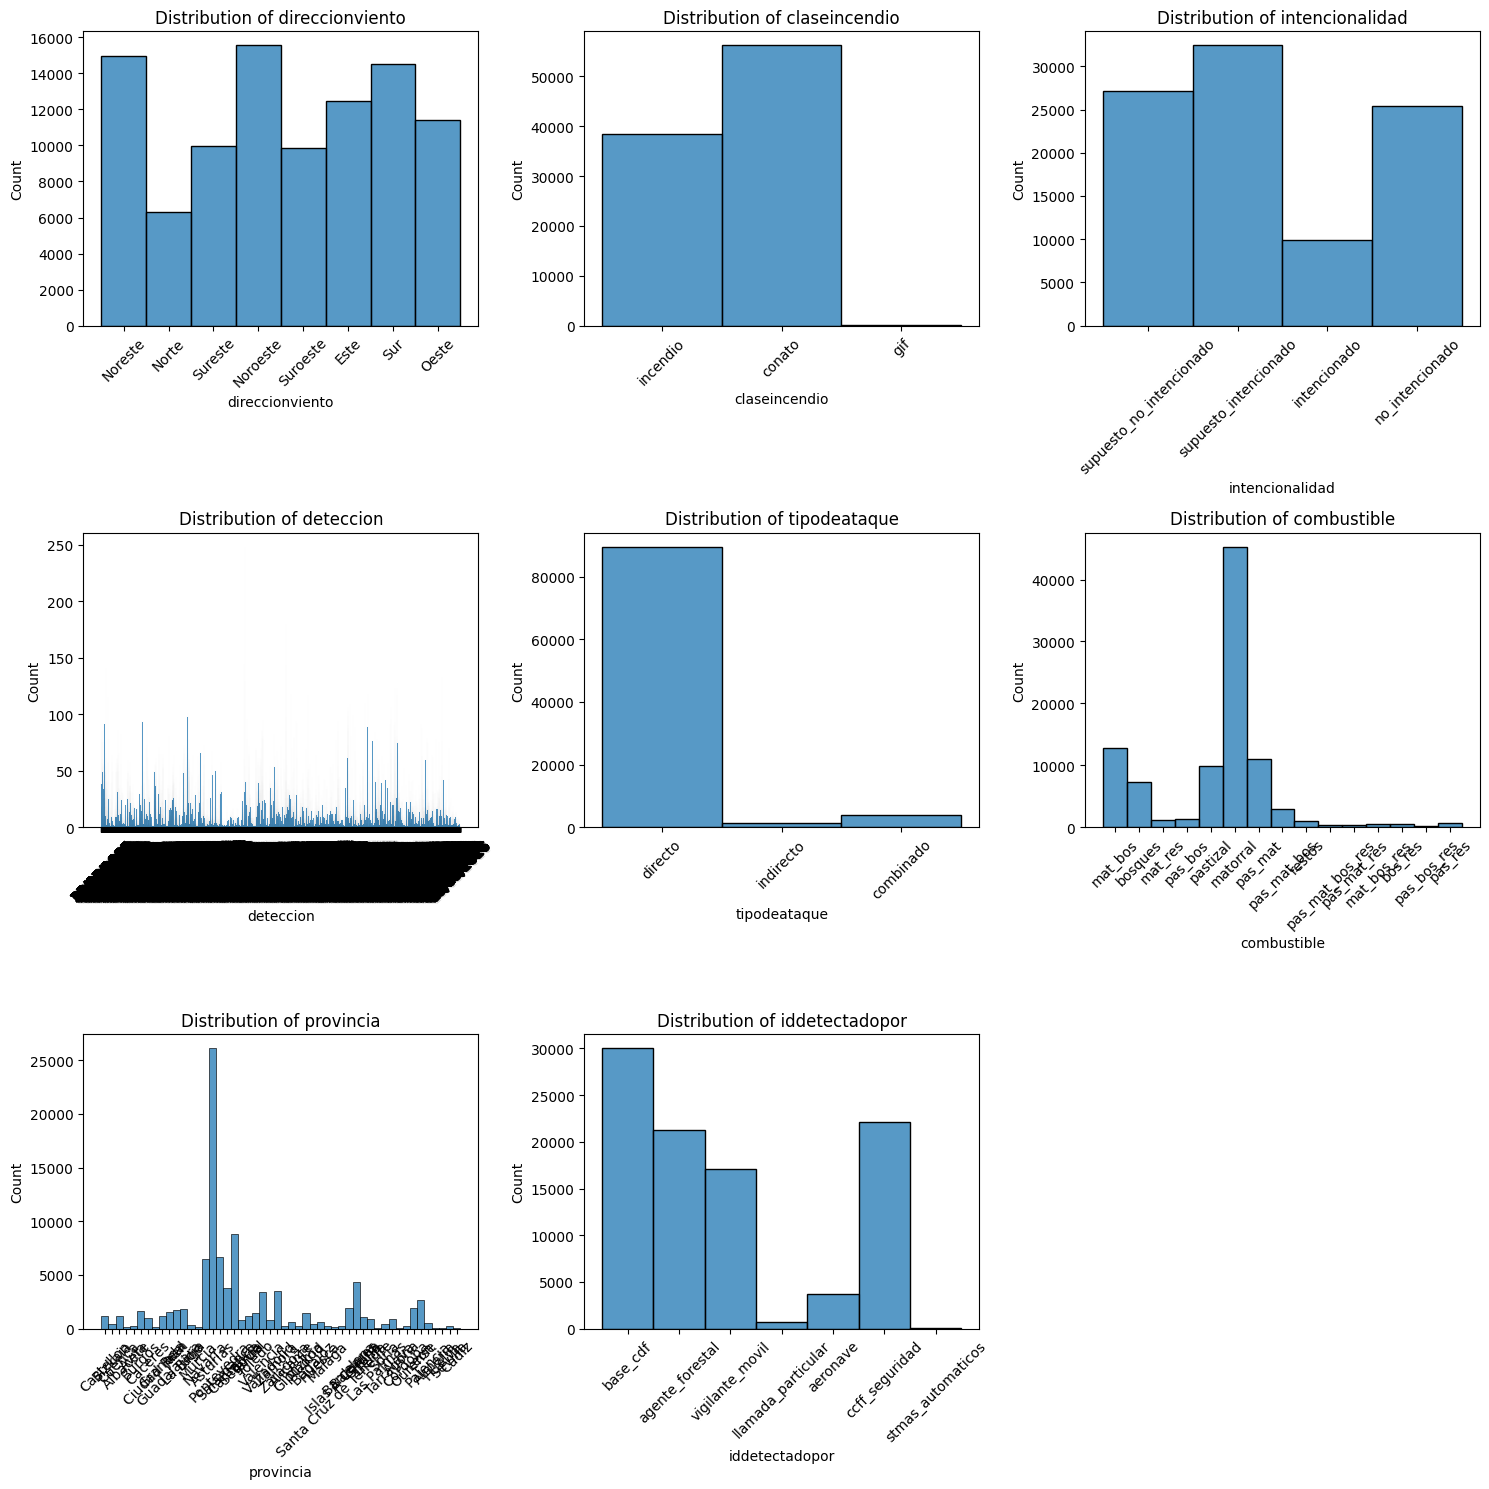

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Define categorical variables to analyze (including two new variables)
categorical_vars = ['direccionviento', 'claseincendio', 'intencionalidad', 'deteccion', 'tipodeataque', 'combustible', 'provincia', 'iddetectadopor']

# Dynamically determine rows and columns for subplots
num_vars = len(categorical_vars)
cols = 3  # Fixed number of columns
rows = math.ceil(num_vars / cols)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))  

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through the variables and plot
for i, var in enumerate(categorical_vars):
    sns.histplot(data=incendios_cleaned, x=var, ax=axes[i], kde=False)
    axes[i].set_title(f"Distribution of {var}")
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(var)
    axes[i].tick_params(axis='x', rotation=45)  

# Hide unused subplots
for i in range(len(categorical_vars), len(axes)):
    axes[i].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p>
Se realizaron gráficos de conteo (count plots) con la variable 'tipodefuego' como hue para evaluar su relación con otras variables categóricas. Esto permite detectar diferencias en la ocurrencia de diferentes tipos de incendios en función de características como dirección del viento, intencionalidad, clase de incendio, entre otros.

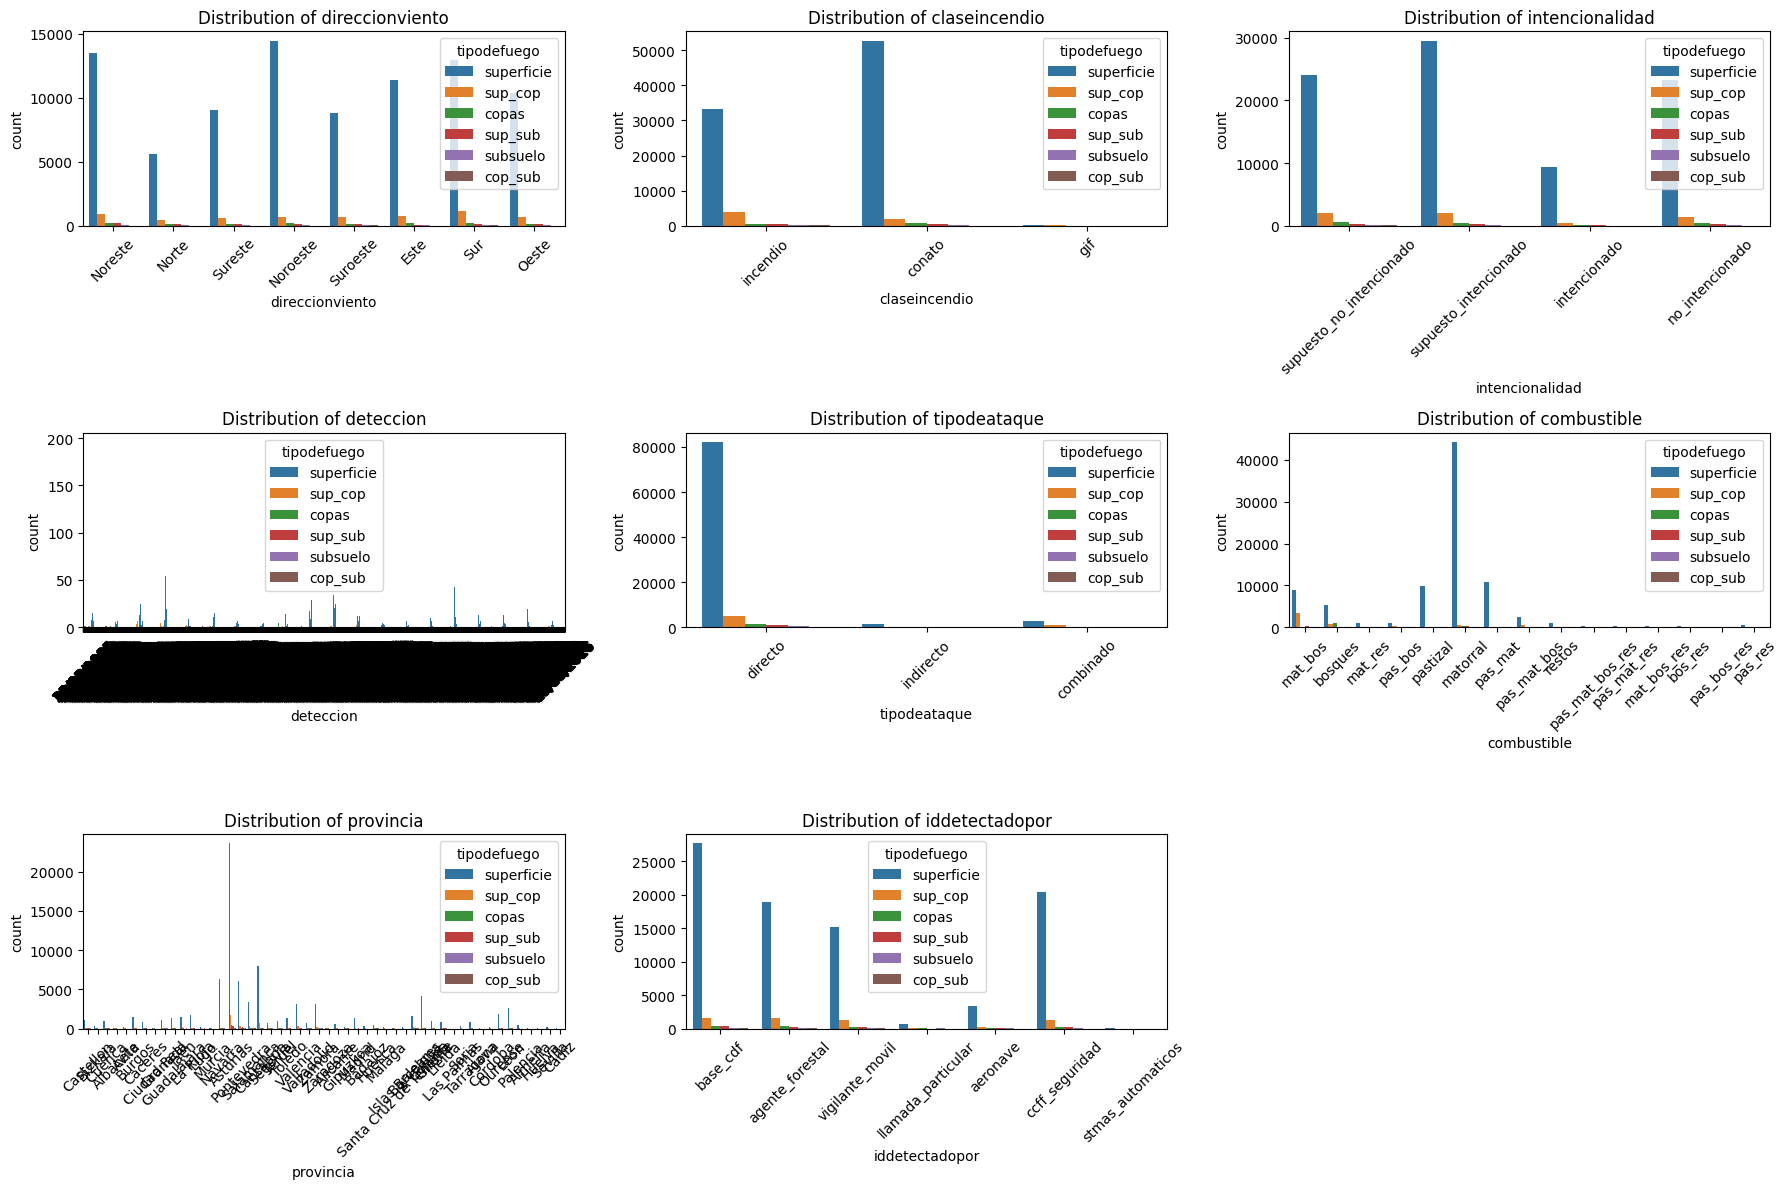

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical variables to plot
categorical_vars = ['direccionviento', 'claseincendio', 'intencionalidad', 'deteccion', 'tipodeataque', 'combustible', 'provincia', 'iddetectadopor']

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through variables and plot count plots
for i, var in enumerate(categorical_vars):
    sns.countplot(ax=axes[i], data=incendios_cleaned, x=var, hue="tipodefuego")
    axes[i].set_title(f"Distribution of {var}")
    axes[i].tick_params(axis='x', rotation=45)  # Improve readability

# Hide unused subplots (if any)
for i in range(len(categorical_vars), len(axes)):
    axes[i].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p>
Para las variables numéricas se generaron histogramas y diagramas de caja (boxplots) para evaluar su distribución y la presencia de valores atípicos. Se realizó este análisis en lotes de cuatro variables para facilitar la interpretación de los gráficos.

Este proceso de análisis exploratorio ha permitido limpiar, estructurar y visualizar adecuadamente el conjunto de datos para su posterior modelado en la predicción de la variable objetivo:

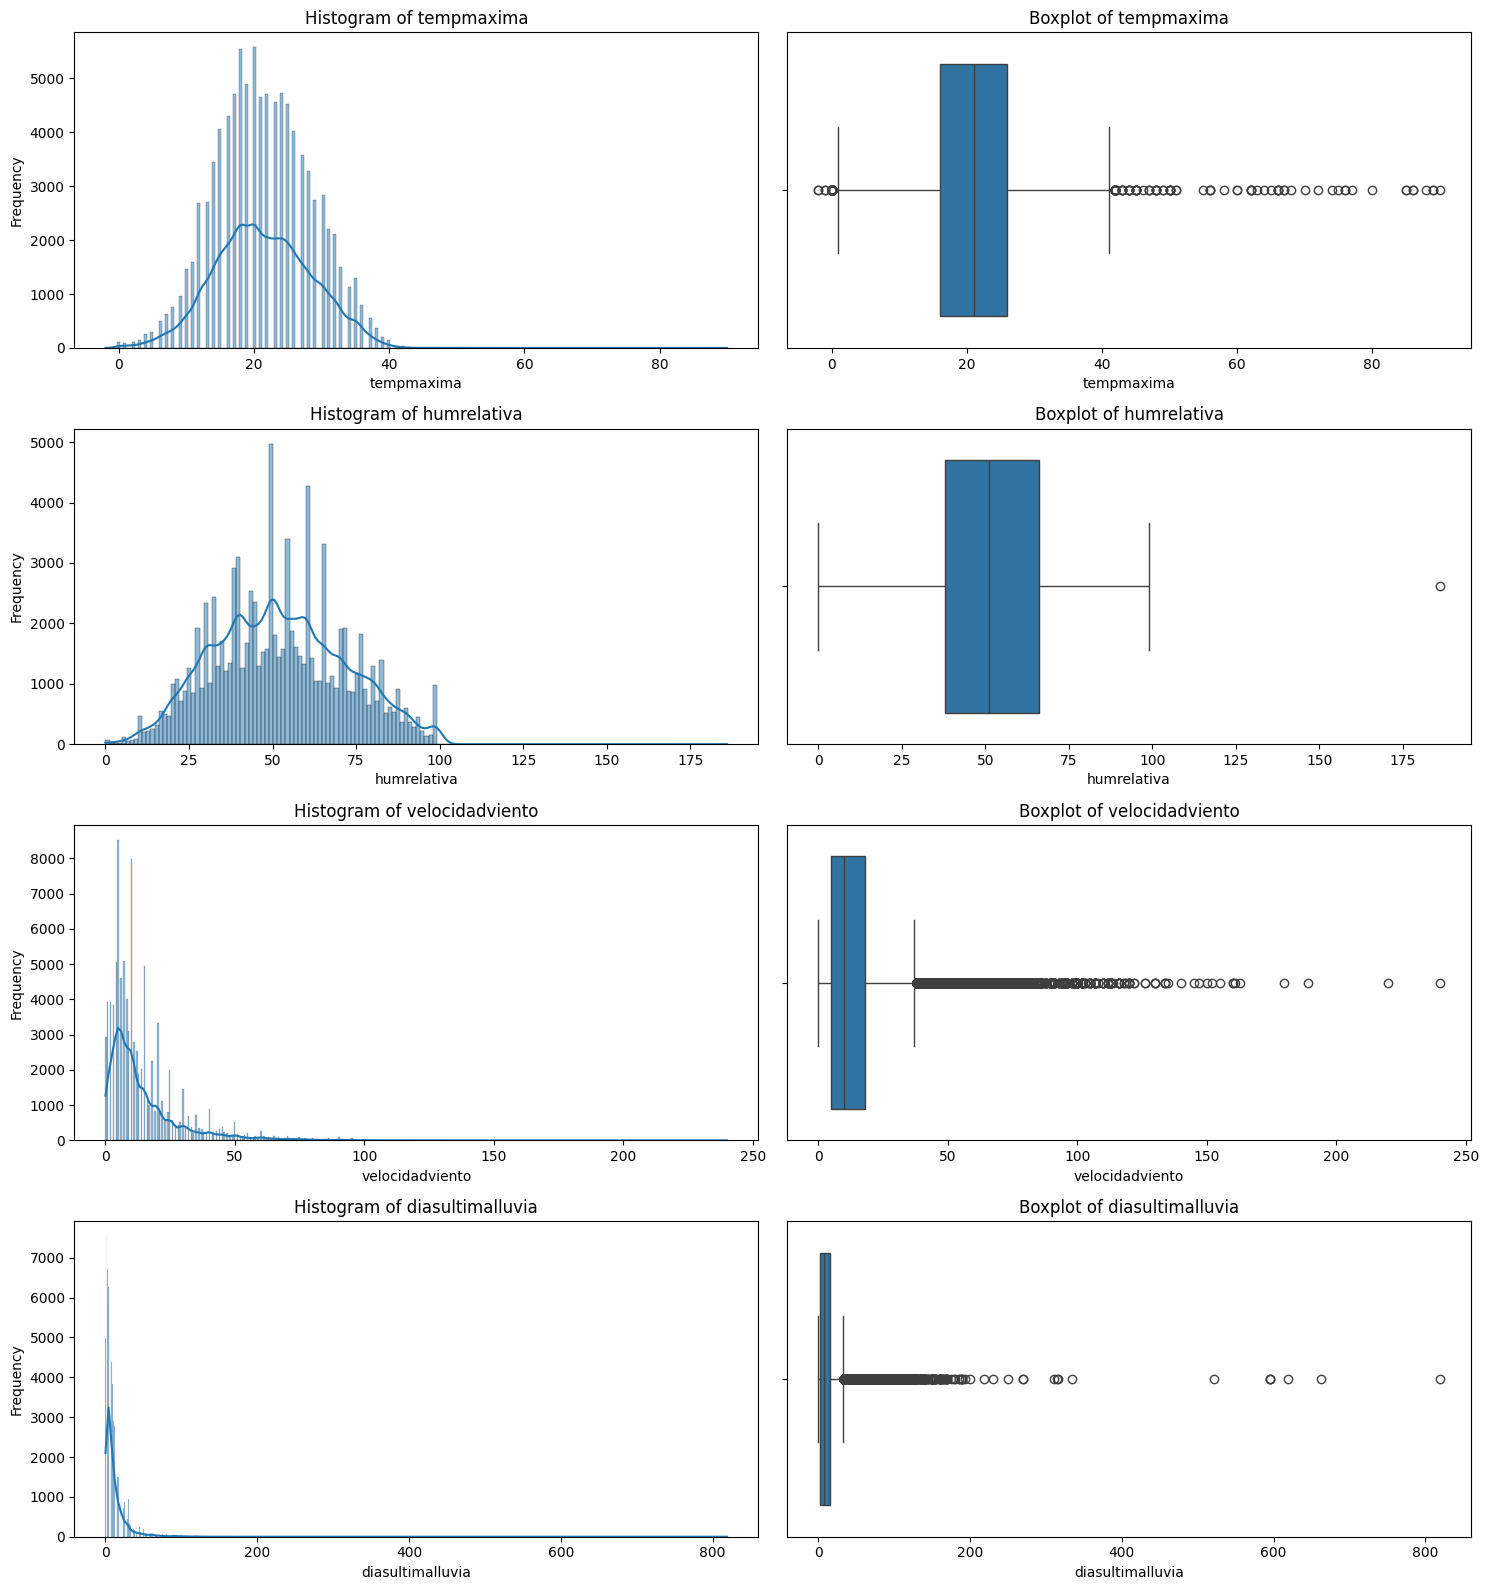

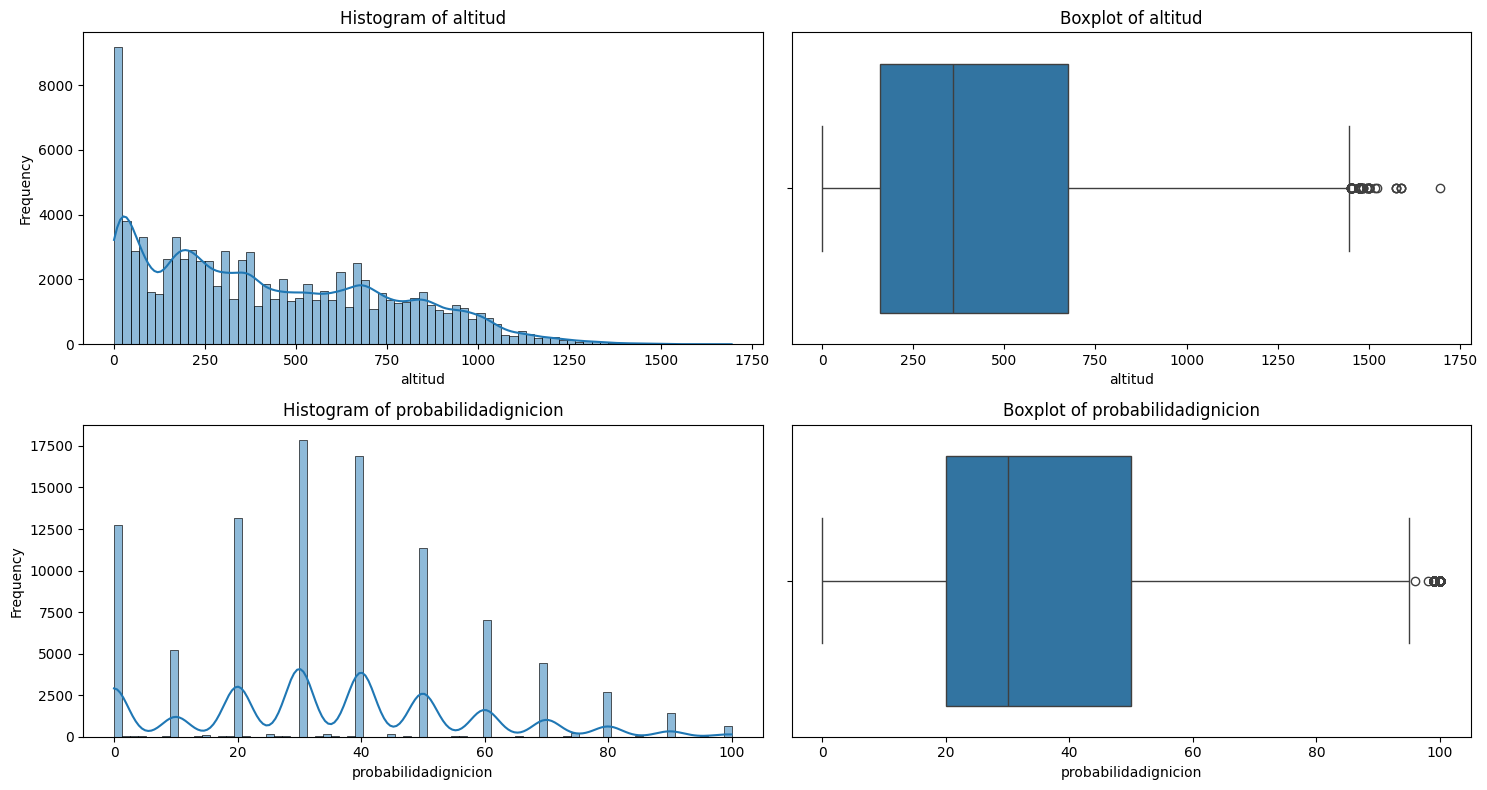

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import math  # For calculating the number of rows dynamically

# Define numerical variables
variables = ['tempmaxima', 'humrelativa', 'velocidadviento', 'diasultimalluvia', 
             'altitud', 'probabilidadignicion']

# Remove rows with missing values for the selected variables
cleaned_data = incendios_cleaned[variables].dropna()

# Plot 4 variables at a time to avoid overcrowding
for i in range(0, len(variables), 4):
    vars_subset = variables[i:i+4]  # Take up to 4 variables at a time
    num_vars = len(vars_subset)  # Number of variables in the current batch
    num_rows = num_vars  # One row per variable (each has histogram & boxplot)
    
    # Create figure with the correct number of rows
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, num_rows * 4))
    
    for j, var in enumerate(vars_subset):
        # Histogram (left column)
        sns.histplot(ax=axes[j, 0], data=cleaned_data, x=var, kde=True)
        axes[j, 0].set_title(f"Histogram of {var}")
        axes[j, 0].set_xlabel(var)
        axes[j, 0].set_ylabel('Frequency')

        # Boxplot (right column)
        sns.boxplot(ax=axes[j, 1], data=cleaned_data, x=var)
        axes[j, 1].set_title(f"Boxplot of {var}")
        axes[j, 1].set_xlabel(var)
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()




In [18]:
incendios_cleaned.shape

(94974, 32)

<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p>
Observamos en los histogramas anteriores la existencia de numerosos outliers por encima de 100 en la variable:

    'probabilidadignicion'

Estos valores no tienen sentido matemático dado que esta variable mide probabilidades. Por tanto serán eliminados en el siguiente paso.

Por otro lado, tambiñen se eliminarán los outliers superiores a 60 ºC en la variable:

    'tempmaxima'

Ya que no es factible registrar valores de temperatura ambientales de ese orden en la latitud de la Península Hibérica.



In [19]:
# Definición del humbral para eliminar outliers
humbral_probabilidadignicion = 100  # Valor máximo aceptado
humbral_tempmaxima = 60  # Max valor aceptado

# Apply filters to remove outliers
incendios_cleaned = incendios_cleaned[
    (incendios_cleaned['probabilidadignicion'] <= humbral_probabilidadignicion) &
    (incendios_cleaned['tempmaxima'] <= humbral_tempmaxima)
]

# Display the updated dataset shape to confirm changes
print(f"Dataset size after removing outliers: {incendios_cleaned.shape}")

Dataset size after removing outliers: (94944, 32)


<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p>

Comprobación de los histogramas y outliers después de su limpieza:

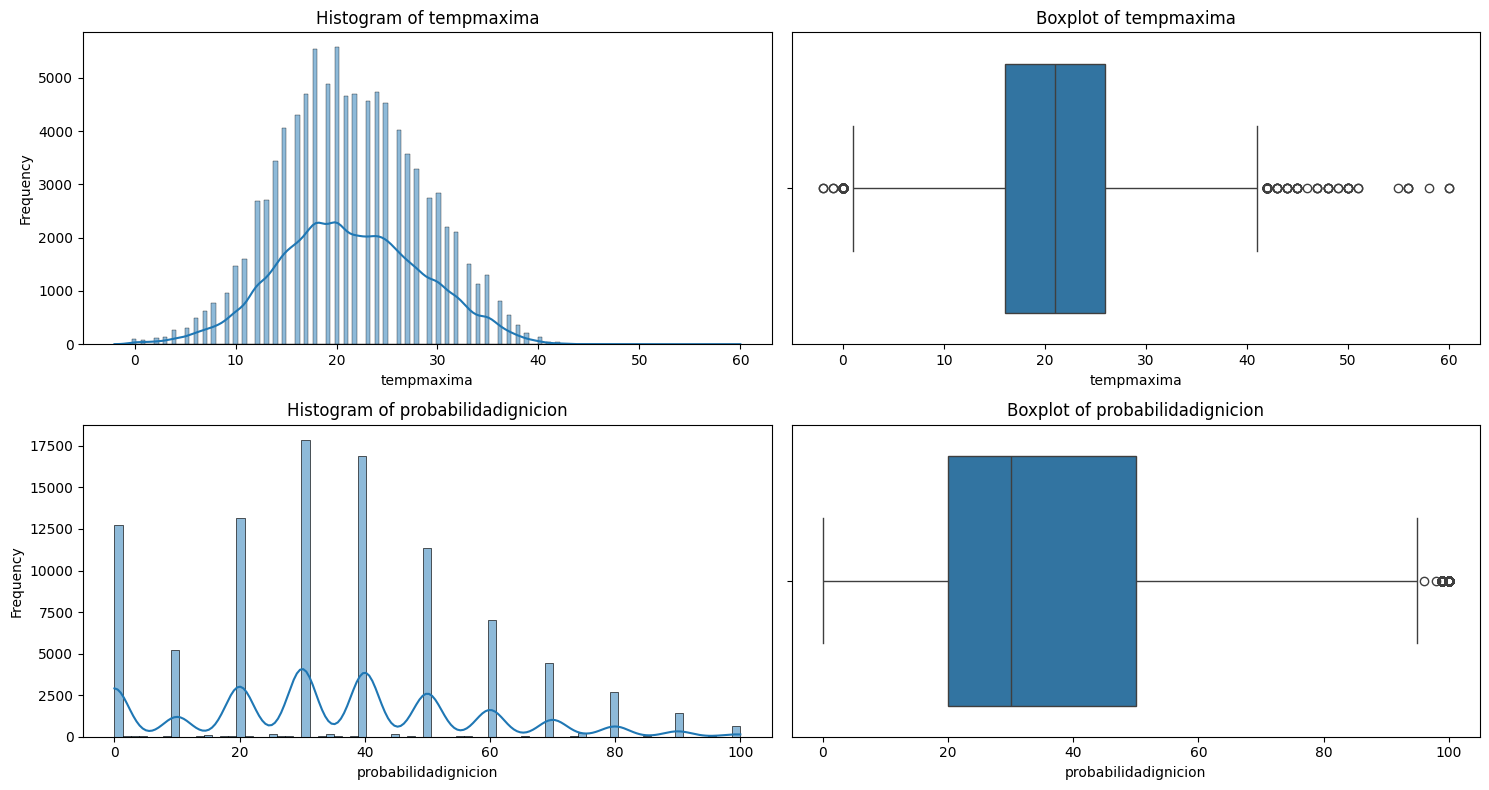

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define variables to plot
variables = ['tempmaxima', 'probabilidadignicion']

# Remove rows with missing values for the selected variables
cleaned_data = incendios_cleaned[variables].dropna()

# Number of variables
num_vars = len(variables)

# Create figure with correct number of rows
fig, axes = plt.subplots(nrows=num_vars, ncols=2, figsize=(15, num_vars * 4))

# Ensure axes is always treated as a list (even if there's only one variable)
if num_vars == 1:
    axes = [axes]

for j, var in enumerate(variables):
    # Histogram (left column)
    sns.histplot(ax=axes[j, 0], data=cleaned_data, x=var, kde=True)
    axes[j, 0].set_title(f"Histogram of {var}")
    axes[j, 0].set_xlabel(var)
    axes[j, 0].set_ylabel('Frequency')

    # Boxplot (right column)
    sns.boxplot(ax=axes[j, 1], data=cleaned_data, x=var)
    axes[j, 1].set_title(f"Boxplot of {var}")
    axes[j, 1].set_xlabel(var)

# Adjust layout and display
plt.tight_layout()
plt.show()


<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p>

El siguiente código utiliza la limitación 'clip' de los valores superiores al percentil 99 de las variables seleccionadas. Esta herramienta ayuda enormemente a reducir los outliers extremos preservando la integridad del dataset:

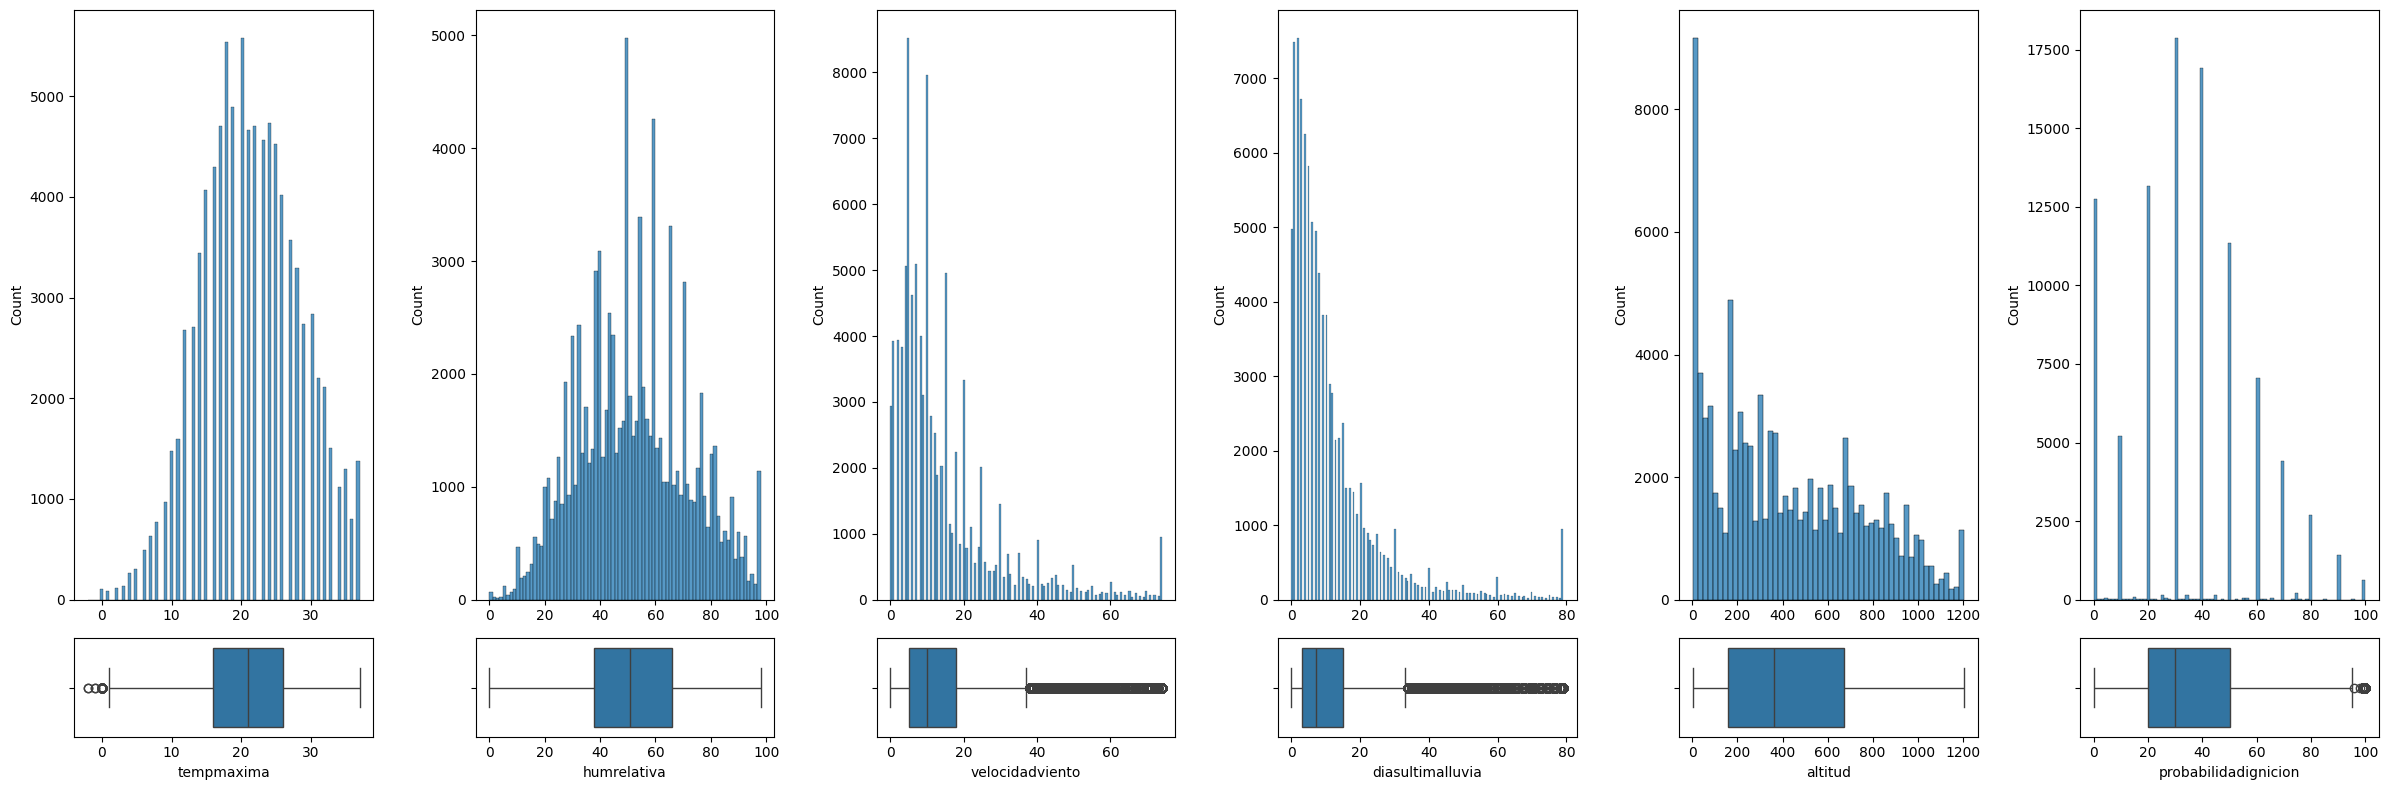

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical variables (excluding the target variable 'probabilidadignicion' from clipping)
variables_to_clip = ['tempmaxima', 'humrelativa', 'velocidadviento', 'diasultimalluvia', 'altitud']

# Apply outlier clipping (only for selected variables, not the target variable)
for col in variables_to_clip:
    incendios_cleaned[col] = incendios_cleaned[col].clip(upper=incendios_cleaned[col].quantile(0.99))

# Define all numerical variables for visualization, including 'probabilidadignicion'
variables = variables_to_clip + ['probabilidadignicion']

# Create figure with correct dimensions
fig, axes = plt.subplots(2, len(variables), figsize=(len(variables) * 4, 8), gridspec_kw={'height_ratios': [6, 1]})

# Plot histograms and boxplots for each variable
for i, var in enumerate(variables):
    sns.histplot(ax=axes[0, i], data=incendios_cleaned, x=var).set(xlabel=None)
    sns.boxplot(ax=axes[1, i], data=incendios_cleaned, x=var)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


<h2 style="background-color: #FFD700; color: black; text-align: center; padding: 10px; border-radius: 10px;">
🛠️ 3. Ingeniería de Atributos (Feature Engineering) 🛠️
</h2>

<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p>

En esta fase del proyecto, hemos llevado a cabo un proceso de feature egineering o <code>ingeniería de atributos</code> para preparar los datos antes del modelado. Este proceso contiene la <code>codificación de variables</code> categóricas para que puedan ser utilizadas por los modelos de machine learning, el <code>escalado de variables numéricas</code>, el <code>análisis de correlaciones</code> y la selección de las características más relevantes, <code>SelectkBest</code>. A continuación, describimos detalladamente cada paso:


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Variables for analysis

categorical_vars = ['comunidad', 'provincia', 'deteccion', 'extinguido', 'horadeteccion', 'mesdeteccion', 'primeranotificaciondesde112',
                    'iddetectadopor', 'intencionalidad', 'direccionviento', 'claseincendio', 'lugar', 'combustible', 'tipodefuego', 'tipodeataque',
                    'idprovincia', 'idmunicipio']


# Define the variables to scale (excluding 'anio', 'latitud', 'longitud', and 'probabilidadignicion')
numerical_vars = ['altitud', 'nummunicipiosafectados', 'duracion', 'diasultimalluvia', 'tempmaxima', 'humrelativa', 'velocidadviento', 'perdidassuperficiales',
                  'numeromediospersonal', 'numeromediospesados', 'numeromediosaereos']


<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p>
Una vez que las variables categóricas han sido convertidas en su versión numérica, eliminamos las columnas originales para evitar redundancias y asegurarnos de que solo trabajamos con datos en formato numérico.</p>


In [25]:
# Step 1. Encoding categorical variables and save them in the dataset
for var in categorical_vars:
    incendios_cleaned[f"{var}_n"] = pd.factorize(incendios_cleaned[var])[0]

# Paso 2: Reemplazar variables originales
incendios_cleaned.drop(categorical_vars, axis=1, inplace=True)

# Save changes to the dataset
incendios_cleaned.to_csv("/workspaces/Machine-Learning-Final-Project.FGM/data/processed/incendio_cleaned.csv", index=False)

In [26]:
print(incendios_cleaned.columns)

Index(['anio', 'probabilidadignicion', 'latitud', 'longitud', 'altitud',
       'nummunicipiosafectados', 'duracion', 'diasultimalluvia', 'tempmaxima',
       'humrelativa', 'velocidadviento', 'perdidassuperficiales',
       'numeromediospersonal', 'numeromediospesados', 'numeromediosaereos',
       'comunidad_n', 'provincia_n', 'deteccion_n', 'extinguido_n',
       'horadeteccion_n', 'mesdeteccion_n', 'primeranotificaciondesde112_n',
       'iddetectadopor_n', 'intencionalidad_n', 'direccionviento_n',
       'claseincendio_n', 'lugar_n', 'combustible_n', 'tipodefuego_n',
       'tipodeataque_n', 'idprovincia_n', 'idmunicipio_n'],
      dtype='object')


<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p>
Aplicamos <code>RobustScaler</code> a las variables numéricas. Este método es resistente a valores atípicos, ya que escala los datos basándose en el rango intercuartílico en lugar de la media y desviación estándar:</p>


In [27]:
from sklearn.preprocessing import RobustScaler

# Crear el Robust Scaler
scaler = RobustScaler()

# Ajustar y transformar los datos numéricos
incendios_cleaned[numerical_vars] = scaler.fit_transform(incendios_cleaned[numerical_vars])

# Cambiar el nombre de las variables numéricas escaladas
for var in numerical_vars:
    incendios_cleaned.rename(columns={var: var + '_r'}, inplace=True)

In [29]:
print(incendios_cleaned.columns)

Index(['anio', 'probabilidadignicion', 'latitud', 'longitud', 'altitud_r',
       'nummunicipiosafectados_r', 'duracion_r', 'diasultimalluvia_r',
       'tempmaxima_r', 'humrelativa_r', 'velocidadviento_r',
       'perdidassuperficiales_r', 'numeromediospersonal_r',
       'numeromediospesados_r', 'numeromediosaereos_r', 'comunidad_n',
       'provincia_n', 'deteccion_n', 'extinguido_n', 'horadeteccion_n',
       'mesdeteccion_n', 'primeranotificaciondesde112_n', 'iddetectadopor_n',
       'intencionalidad_n', 'direccionviento_n', 'claseincendio_n', 'lugar_n',
       'combustible_n', 'tipodefuego_n', 'tipodeataque_n', 'idprovincia_n',
       'idmunicipio_n'],
      dtype='object')


<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p>
 
**Creación de la Matriz de Correlación**

Generamos una matriz de correlación entre todas las variables transformadas (numéricas escaladas y categóricas codificadas). Posteriormente, visualizamos esta matriz con un heatmap de Seaborn para analizar las relaciones entre las variables.</p>

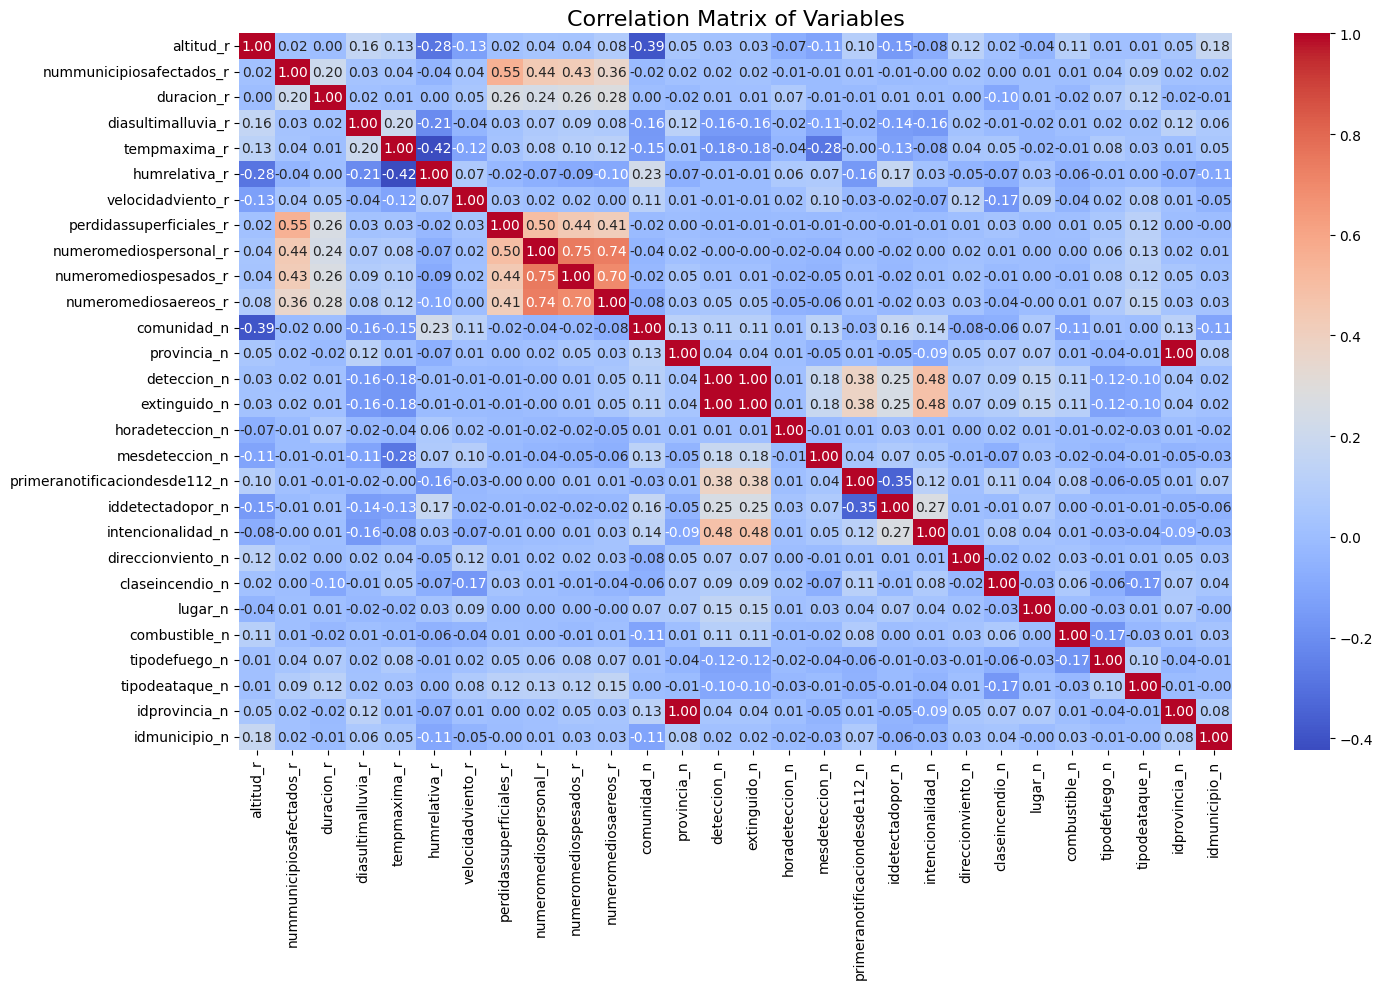

In [30]:
# Step 2: Select numerical and encoded categorical variables
analysis_vars = [f"{var}_r" for var in numerical_vars] + [f"{var}_n" for var in categorical_vars]

# Step 3: Compute correlation matrix
correlation_matrix = incendios_cleaned[analysis_vars].corr()

# Step 4: Plot heatmap
fig, axis = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add title and adjust layout
axis.set_title("Correlation Matrix of Variables", fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

In [31]:
incendios_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94944 entries, 71837 to 584722
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   anio                           94944 non-null  int64  
 1   probabilidadignicion           94944 non-null  float64
 2   latitud                        94944 non-null  float64
 3   longitud                       94944 non-null  float64
 4   altitud_r                      94944 non-null  float64
 5   nummunicipiosafectados_r       94944 non-null  float64
 6   duracion_r                     94944 non-null  float64
 7   diasultimalluvia_r             94944 non-null  float64
 8   tempmaxima_r                   94944 non-null  float64
 9   humrelativa_r                  94944 non-null  float64
 10  velocidadviento_r              94944 non-null  float64
 11  perdidassuperficiales_r        94944 non-null  float64
 12  numeromediospersonal_r         94944 non-null 

In [32]:
incendios_cleaned.describe()

,anio,probabilidadignicion,latitud,longitud,altitud_r,nummunicipiosafectados_r,duracion_r,diasultimalluvia_r,tempmaxima_r,humrelativa_r,velocidadviento_r,perdidassuperficiales_r,numeromediospersonal_r,numeromediospesados_r,numeromediosaereos_r,comunidad_n,provincia_n,deteccion_n,extinguido_n,horadeteccion_n,mesdeteccion_n,primeranotificaciondesde112_n,iddetectadopor_n,intencionalidad_n,direccionviento_n,claseincendio_n,lugar_n,combustible_n,tipodefuego_n,tipodeataque_n,idprovincia_n,idmunicipio_n
count,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000,94944.000000
mean,2002.565070,34.697896,42.052288,-4.564952,0.122026,0.012523,0.199044,0.385000,0.035582,0.039685,0.329153,3.331542,1.804158,1.144331,2.221467,7.605567,19.500242,3673.364836,3698.895854,1.276763,4.389535,0.124695,1.928916,1.353587,3.594550,0.596678,1.489878,4.226786,0.143611,0.098827,19.500242,131.588589
std,8.367558,22.562572,1.613752,2.749136,0.627083,0.165742,0.953599,1.147087,0.705333,0.701458,1.101535,59.171870,21.390949,9.504461,13.429984,4.008835,9.978110,2234.040092,2248.949950,0.717553,3.076110,0.330374,1.935983,1.156296,2.315078,0.495183,2.088099,2.398536,0.531185,0.415459,9.978110,84.556091
min,1983.000000,0.000000,27.924000,-17.943000,-0.695736,0.000000,0.000000,-0.583333,-2.300000,-1.821429,-0.769231,-0.275862,-0.666667,-0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,20.000000,41.364000,-6.415000,-0.391473,0.000000,0.000000,-0.333333,-0.500000,-0.464286,-0.384615,-0.241379,-0.333333,-0.400000,0.000000,3.000000,15.000000,1659.000000,1667.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,15.000000,59.000000
50%,2004.000000,30.000000,42.589000,-5.073000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,16.000000,3719.000000,3749.000000,1.000000,4.000000,0.000000,1.000000,1.000000,4.000000,1.000000,1.000000,5.000000,0.000000,0.000000,16.000000,120.000000
75%,2010.000000,50.000000,43.257000,-2.931000,0.608527,0.000000,0.000000,0.666667,0.500000,0.535714,0.615385,0.758621,0.666667,0.600000,0.000000,10.000000,22.000000,5705.000000,5745.000000,2.000000,7.000000,0.000000,4.000000,3.000000,6.000000,1.000000,2.000000,5.000000,0.000000,0.000000,22.000000,184.000000
max,2016.000000,100.000000,43.740000,4.265000,1.639535,15.000000,153.000000,6.000000,1.600000,1.678571,4.923077,9958.034483,2966.000000,779.600000,1281.000000,16.000000,49.000000,7681.000000,7732.000000,3.000000,11.000000,1.000000,6.000000,3.000000,7.000000,2.000000,7.000000,14.000000,5.000000,2.000000,49.000000,451.000000


<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p>Eliminamos ciertas variables que no aportan valor significativo al modelo y que no proveen de información predictiva sobre la generación o tamaño de un incendio. Estas prácticas ayudan a reducir la dimensionalidad y mejorar la eficiencia del modelo.


In [ ]:
# Lista de columnas a eliminar
columnas_a_eliminar = ["numeromediospersonal_r", "numeromediospesados_r", "numeromediosaereos_r",
    "primeranotificaciondesde112_n", "extinguido_n"]

# Eliminar las columnas del DataFrame
incendios_cleaned = incendios_cleaned.drop(columns=columnas_a_eliminar)

# Verificar que las columnas fueron eliminadas
print(incendios_cleaned.columns)

Index(['anio', 'probabilidadignicion', 'latitud', 'longitud', 'altitud_r',
       'nummunicipiosafectados_r', 'duracion_r', 'diasultimalluvia_r',
       'tempmaxima_r', 'humrelativa_r', 'velocidadviento_r',
       'perdidassuperficiales_r', 'comunidad_n', 'provincia_n', 'deteccion_n',
       'horadeteccion_n', 'mesdeteccion_n', 'iddetectadopor_n',
       'intencionalidad_n', 'direccionviento_n', 'claseincendio_n', 'lugar_n',
       'combustible_n', 'tipodefuego_n', 'tipodeataque_n', 'idprovincia_n',
       'idmunicipio_n'],
      dtype='object')


<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p>
    
**División en Conjuntos de Entrenamiento y Prueba -> Train y Test**

Dividimos el conjunto de datos en una muestra de entrenamiento (<code>X_train</code>, <code>y_train</code>) y una de prueba (<code>X_test</code>, <code>y_test</code>) con una proporción de 80%-20%. Usamos <code>train_test_split</code> con una semilla aleatoria (<code>random_state=42</code>) para garantizar reproducibilidad:

In [ ]:
# modelado
from sklearn.model_selection import train_test_split

# Dividimos el conjunto de datos en muestras de train y test
X = incendios_cleaned.drop("probabilidadignicion", axis = 1)
y = incendios_cleaned["probabilidadignicion"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()


,anio,latitud,longitud,altitud_r,nummunicipiosafectados_r,duracion_r,diasultimalluvia_r,tempmaxima_r,humrelativa_r,velocidadviento_r,perdidassuperficiales_r,comunidad_n,provincia_n,deteccion_n,horadeteccion_n,mesdeteccion_n,iddetectadopor_n,intencionalidad_n,direccionviento_n,claseincendio_n,lugar_n,combustible_n,tipodefuego_n,tipodeataque_n,idprovincia_n,idmunicipio_n
202315,1994,40.145,-1.686,1.639535,0.0,0.0,0.000000,-0.3,-1.250000,-0.461538,-0.275862,2,2,1460,0,8,2,0,5,1,0,4,0,0,2,309
225877,1995,42.254,-0.644,0.494186,0.0,0.0,-0.500000,0.0,0.321429,0.384615,1.793103,12,30,1914,1,2,1,0,6,0,0,4,0,0,30,136
413220,2004,42.082,-7.832,0.507752,0.0,0.0,-0.250000,-0.7,-0.321429,0.000000,0.068966,7,43,3723,1,7,2,1,5,1,0,5,0,0,43,60
526119,2011,43.441,-5.852,-0.350775,0.0,0.0,-0.333333,-0.7,1.357143,-0.384615,0.034483,10,15,6129,3,7,5,3,0,1,0,8,0,0,15,27
557103,2013,43.159,-3.783,-0.005814,0.0,1.0,-0.083333,-0.4,0.571429,2.000000,2.655172,11,18,6567,2,0,2,1,6,0,2,1,0,0,18,34


<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
    <p>
    Utilizamos <code>SelectKBest</code> con la función <code>f_regression</code> para seleccionar las 12 variables más relevantes. Esto se basa en la relación estadística entre cada variable independiente y la variable objetivo (<code>probabilidadignicion</code>).</p>


In [37]:
# escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# selecicon
from sklearn.feature_selection import f_classif, SelectKBest, f_regression

In [ ]:
import numpy as np 
#Create the SelectKBest model with f_classif as the scoring function and k to select the top features
selection_model = SelectKBest(score_func=f_regression, k=12)

# Train the model on the training data
selection_model.fit(X_train, y_train)

# Get the indices of the selected features
selected_features = selection_model.get_support(indices=True)

# Print the names of the selected features from the original training data columns
print("Selected features:", X_train.columns[selected_features])




Selected features: Index(['anio', 'latitud', 'longitud', 'altitud_r', 'diasultimalluvia_r',
       'tempmaxima_r', 'humrelativa_r', 'provincia_n', 'deteccion_n',
       'iddetectadopor_n', 'intencionalidad_n', 'idmunicipio_n'],
      dtype='object')


In [39]:
# Create DataFrames containing the selected features from the training and testing data
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns[selected_features])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns[selected_features])

X_train_sel = X_train_sel.drop(columns=['anio', 'deteccion_n', 'idmunicipio_n', 'iddetectadopor_n', 'intencionalidad_n'])
X_test_sel = X_test_sel.drop(columns=['anio', 'deteccion_n', 'idmunicipio_n', 'iddetectadopor_n', 'intencionalidad_n'])
X_train_sel['mesdeteccion_n'] = X_train['mesdeteccion_n'].values
X_test_sel['mesdeteccion_n'] = X_test['mesdeteccion_n'].values
X_train_sel['horadeteccion_n'] = X_train['horadeteccion_n'].values
X_test_sel['horadeteccion_n'] = X_test['horadeteccion_n'].values

# Print the head of the selected features DataFrame for training data
print("X_train_sel.head:")
print(X_train_sel.head())
X_train_sel.head()

X_train_sel.head:
   latitud  longitud  altitud_r  diasultimalluvia_r  tempmaxima_r  \
0   40.145    -1.686   1.639535            0.000000          -0.3   
1   42.254    -0.644   0.494186           -0.500000           0.0   
2   42.082    -7.832   0.507752           -0.250000          -0.7   
3   43.441    -5.852  -0.350775           -0.333333          -0.7   
4   43.159    -3.783  -0.005814           -0.083333          -0.4   

   humrelativa_r  provincia_n  mesdeteccion_n  horadeteccion_n  
0      -1.250000          2.0               8                0  
1       0.321429         30.0               2                1  
2      -0.321429         43.0               7                1  
3       1.357143         15.0               7                3  
4       0.571429         18.0               0                2  


,latitud,longitud,altitud_r,diasultimalluvia_r,tempmaxima_r,humrelativa_r,provincia_n,mesdeteccion_n,horadeteccion_n
0,40.145,-1.686,1.639535,0.000000,-0.3,-1.250000,2.0,8,0
1,42.254,-0.644,0.494186,-0.500000,0.0,0.321429,30.0,2,1
2,42.082,-7.832,0.507752,-0.250000,-0.7,-0.321429,43.0,7,1
3,43.441,-5.852,-0.350775,-0.333333,-0.7,1.357143,15.0,7,3
4,43.159,-3.783,-0.005814,-0.083333,-0.4,0.571429,18.0,0,2


Con estos pasos completados, los datos están listos para pasar a la fase de evaluación y entrenar diferentes modelos! 🚀

<h2 style="background-color: #32CD32; color: white; text-align: center; padding: 10px; border-radius: 10px;">
🤖 4. Modelado y Evaluación 🤖
</h2>

<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;"> <p> En esta fase, hemos tratado de implementar diversos modelos de machine learning para evaluar la idoneidad de cada uno y como se adaptan a nuestro problema concreto.

<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;"> <p> Debido a su robustez y simplicidad, hemos comenzado implementando diversos modelos de regresión para predecir la variable objetivo <code>'probabilidadignicion'</code>.

<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;"> <p> Para cada uno de los modelos testeados se calculan de forma estructurada los parámetros  <code>R², RMSE y MAE</code> tanto en el conjunto de entrenamiento como en el de prueba, evaluando su capacidad predictiva y sirviendo de factor de comparación. </p>

<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;"> <p> Se inicia con un modelo de <b>Regresión Lineal</b>, estableciendo una línea base para la comparación con modelos más avanzados:

In [41]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_sel, y_train)

# Predictions on train and test sets
y_train_pred = lr_model.predict(X_train_sel)
y_test_pred = lr_model.predict(X_test_sel)

# Calculate evaluation metrics for train set
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate evaluation metrics for test set
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)

# Organizing the results
linear_regression_results = {
    "Train Set": {"R²": r2_train, "RMSE": rmse_train, "MAE": mae_train},
    "Test Set": {"R²": r2_test, "RMSE": rmse_test, "MAE": mae_test},
}

# Print results in a structured way
linear_regression_results

{'Train Set': {'R²': 0.3556945426554383,
  'RMSE': np.float64(18.111517580431435),
  'MAE': np.float64(13.675237611386413)},
 'Test Set': {'R²': 0.3566014837078022,
  'RMSE': np.float64(18.094034154748027),
  'MAE': np.float64(13.663422392156619)}}

<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;"> <p>  Posteriormente, se introduce la <b>Regresión Lasso</b> con ajuste de hiperparámetros mediante la variación del parámetro <code>alpha</code>. Se grafica la evolución del R² en función de <code>alpha</code>, permitiendo identificar valores óptimos que controlen la regularización y reduzcan la complejidad del modelo.

In [42]:
# Import necessary library
from sklearn.linear_model import Lasso

# Initialize and train the Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # Default alpha, can be tuned later
lasso_model.fit(X_train_sel, y_train)

# Predictions on train and test sets
y_train_pred_lasso = lasso_model.predict(X_train_sel)
y_test_pred_lasso = lasso_model.predict(X_test_sel)

# Calculate evaluation metrics for train set
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
mae_train_lasso = mean_absolute_error(y_train, y_train_pred_lasso)

# Calculate evaluation metrics for test set
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
mae_test_lasso = mean_absolute_error(y_test, y_test_pred_lasso)

# Organizing the results
lasso_results = {
    "Train Set": {"R²": r2_train_lasso, "RMSE": rmse_train_lasso, "MAE": mae_train_lasso},
    "Test Set": {"R²": r2_test_lasso, "RMSE": rmse_test_lasso, "MAE": mae_test_lasso},
}

# Print results in a structured way
lasso_results

{'Train Set': {'R²': 0.3483336683079442,
  'RMSE': np.float64(18.214681378011694),
  'MAE': np.float64(13.795527502766584)},
 'Test Set': {'R²': 0.35005360403160934,
  'RMSE': np.float64(18.18587276065292),
  'MAE': np.float64(13.751318514121074)}}

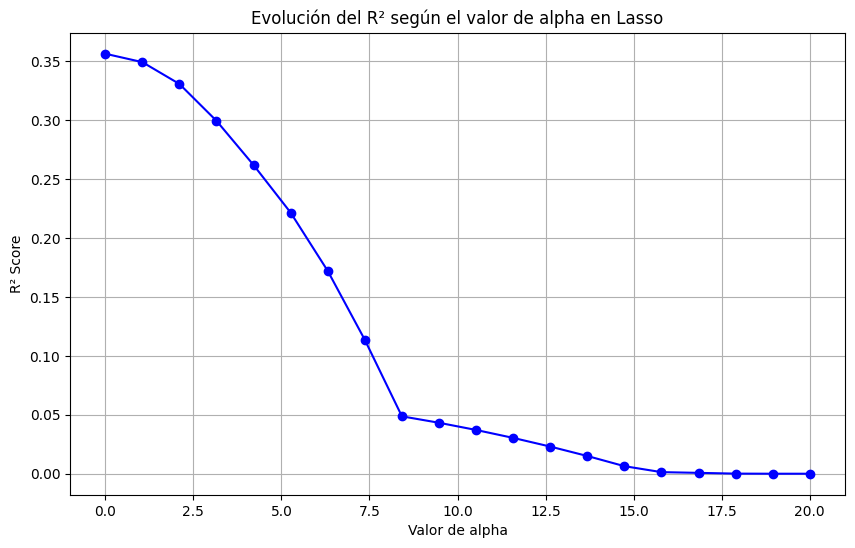

In [43]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Define a range of alpha values
alpha_values = np.linspace(0.0001, 20.0, 20)

# Store R² scores
r2_scores = []

# Train a Lasso model for each alpha value
for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_sel, y_train)
    y_test_pred = lasso_model.predict(X_test_sel)
    r2_scores.append(r2_score(y_test, y_test_pred))

# Plot the R² score evolution
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, r2_scores, marker='o', linestyle='-', color='b')
plt.title('Evolución del R² según el valor de alpha en Lasso')
plt.xlabel('Valor de alpha')
plt.ylabel('R² Score')
plt.grid(True)
plt.show()


<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;"> <p> Para mejorar el rendimiento, se entrenan modelos más sofisticados como <b>Random Forest</b>:


In [44]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_sel, y_train)

# Predictions on train and test sets
y_train_pred_rf = rf_model.predict(X_train_sel)
y_test_pred_rf = rf_model.predict(X_test_sel)

# Calculate evaluation metrics for train set
r2_train_rf = r2_score(y_train, y_train_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)

# Calculate evaluation metrics for test set
r2_test_rf = r2_score(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)

# Organizing the results
random_forest_results = {
    "Train Set": {"R²": r2_train_rf, "RMSE": rmse_train_rf, "MAE": mae_train_rf},
    "Test Set": {"R²": r2_test_rf, "RMSE": rmse_test_rf, "MAE": mae_test_rf},
}

# Print results in a structured way
random_forest_results


{'Train Set': {'R²': 0.9599381451436965,
  'RMSE': np.float64(4.516213487351408),
  'MAE': np.float64(2.643267858932258)},
 'Test Set': {'R²': 0.7218740986164851,
  'RMSE': np.float64(11.896414732895368),
  'MAE': np.float64(7.048329298947815)}}

<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;"> <b>XGBoost</b>:

In [45]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize and train the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgb_model.fit(X_train_sel, y_train)

# Predictions on train and test sets
y_train_pred_xgb = xgb_model.predict(X_train_sel)
y_test_pred_xgb = xgb_model.predict(X_test_sel)

# Calculate evaluation metrics for train set
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
mae_train_xgb = mean_absolute_error(y_train, y_train_pred_xgb)

# Calculate evaluation metrics for test set
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
mae_test_xgb = mean_absolute_error(y_test, y_test_pred_xgb)

# Organizing the results
xgboost_results = {
    "Train Set": {"R²": r2_train_xgb, "RMSE": rmse_train_xgb, "MAE": mae_train_xgb},
    "Test Set": {"R²": r2_test_xgb, "RMSE": rmse_test_xgb, "MAE": mae_test_xgb},
}

# Print results in a structured way
xgboost_results


{'Train Set': {'R²': 0.7419007865015393,
  'RMSE': np.float64(11.463105182100383),
  'MAE': np.float64(7.8533446816571875)},
 'Test Set': {'R²': 0.6728586323876568,
  'RMSE': np.float64(12.902180421623783),
  'MAE': np.float64(8.658493405700629)}}

<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;"> <b>LightGBM</b>:

In [46]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Initialize the LightGBM Regressor
lgb_model = lgb.LGBMRegressor(random_state=42)

# Train the model
lgb_model.fit(X_train_sel, y_train)

# Predictions on train and test sets
y_train_pred_lgb = lgb_model.predict(X_train_sel)
y_test_pred_lgb = lgb_model.predict(X_test_sel)

# Calculate evaluation metrics
r2_train_lgb = r2_score(y_train, y_train_pred_lgb)
rmse_train_lgb = np.sqrt(mean_squared_error(y_train, y_train_pred_lgb))
mae_train_lgb = mean_absolute_error(y_train, y_train_pred_lgb)

r2_test_lgb = r2_score(y_test, y_test_pred_lgb)
rmse_test_lgb = np.sqrt(mean_squared_error(y_test, y_test_pred_lgb))
mae_test_lgb = mean_absolute_error(y_test, y_test_pred_lgb)

# Organizing the results
lightgbm_results = {
    "Train Set": {"R²": r2_train_lgb, "RMSE": rmse_train_lgb, "MAE": mae_train_lgb},
    "Test Set": {"R²": r2_test_lgb, "RMSE": rmse_test_lgb, "MAE": mae_test_lgb},
}

# Print results in a structured way
lightgbm_results


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1049
[LightGBM] [Info] Number of data points in the train set: 75955, number of used features: 9
[LightGBM] [Info] Start training from score 34.690435


{'Train Set': {'R²': 0.6687080500325908,
  'RMSE': np.float64(12.987165603206707),
  'MAE': np.float64(9.060499736786348)},
 'Test Set': {'R²': 0.6465018091687663,
  'RMSE': np.float64(13.411858906108716),
  'MAE': np.float64(9.248598779752612)}}

<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;"> También se ha realizado un test con una <b>Red Neuronal</b>:

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Set random seed for reproducibility
tf.random.set_seed(42)

# Define the Neural Network model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_sel.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    
    Dense(1)  # Output layer for regression
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = nn_model.fit(
    X_train_sel, y_train,
    validation_data=(X_test_sel, y_test),
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Predictions on train and test sets
y_train_pred_nn = nn_model.predict(X_train_sel).flatten()
y_test_pred_nn = nn_model.predict(X_test_sel).flatten()

# Calculate evaluation metrics
r2_train_nn = r2_score(y_train, y_train_pred_nn)
rmse_train_nn = np.sqrt(mean_squared_error(y_train, y_train_pred_nn))
mae_train_nn = mean_absolute_error(y_train, y_train_pred_nn)

r2_test_nn = r2_score(y_test, y_test_pred_nn)
rmse_test_nn = np.sqrt(mean_squared_error(y_test, y_test_pred_nn))
mae_test_nn = mean_absolute_error(y_test, y_test_pred_nn)

# Organizing the results
nn_results = {
    "Train Set": {"R²": r2_train_nn, "RMSE": rmse_train_nn, "MAE": mae_train_nn},
    "Test Set": {"R²": r2_test_nn, "RMSE": rmse_test_nn, "MAE": mae_test_nn},
}

# Print results in a structured way
nn_results


2025-02-13 14:58:45.512406: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-13 14:58:45.564928: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-13 14:58:45.784001: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-13 14:58:45.941061: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739458726.256504     585 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739458726.37

Epoch 1/200


/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-13 14:58:50.421026: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


2374/2374 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 421.3735 - val_loss: 328.7164
Epoch 2/200
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 276.7656 - val_loss: 325.7730
Epoch 3/200
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 274.3257 - val_loss: 257.2790
Epoch 4/200
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 270.5090 - val_loss: 238.4097
Epoch 5/200
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 270.3430 - val_loss: 243.6803
Epoch 6/200
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 269.1830 - val_loss: 243.2110
Epoch 7/200
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 267.2475 - val_loss: 280.2409
Epoch 8/200
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 265.6645 - val_loss: 234.2734
Epoch 9/200
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 265.2000 - val_loss: 234.9289
Epoch 10/200
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 265.3567 - val_loss: 231.4503
Epoch 11/200
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 264.6338 - v

{'Train Set': {'R²': 0.5670539131858723,
  'RMSE': np.float64(14.846560286418542),
  'MAE': np.float64(10.541069040153443)},
 'Test Set': {'R²': 0.5672640051594635,
  'RMSE': np.float64(14.839077014763536),
  'MAE': np.float64(10.500485855291677)}}

<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;"> Finalmente, se comparan los resultados obtenidos en todos los modelos, identificando cuál ofrece el mejor equilibrio entre precisión y capacidad de generalización. Esta evaluación es crucial para seleccionar el modelo final que optimizará las predicciones en el contexto del problema estudiado.


<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;"> El siguiente código recoge los resultados de los modelos anteriores y los almacena en una tabla que permite un análsis visual de todos los parámetros clave de rendimiento:

In [48]:
import pandas as pd

# Collecting results from all models
model_comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso", "Random Forest", "XGBoost", "LightGBM", "Neural Network"],
    
    # Train metrics
    "Train R²": [
        linear_regression_results["Train Set"]["R²"],
        lasso_results["Train Set"]["R²"],
        random_forest_results["Train Set"]["R²"],
        xgboost_results["Train Set"]["R²"],
        lightgbm_results["Train Set"]["R²"],
        nn_results["Train Set"]["R²"]
    ],
    "Train RMSE": [
        linear_regression_results["Train Set"]["RMSE"],
        lasso_results["Train Set"]["RMSE"],
        random_forest_results["Train Set"]["RMSE"],
        xgboost_results["Train Set"]["RMSE"],
        lightgbm_results["Train Set"]["RMSE"],
        nn_results["Train Set"]["RMSE"]
    ],
    "Train MAE": [
        linear_regression_results["Train Set"]["MAE"],
        lasso_results["Train Set"]["MAE"],
        random_forest_results["Train Set"]["MAE"],
        xgboost_results["Train Set"]["MAE"],
        lightgbm_results["Train Set"]["MAE"],
        nn_results["Train Set"]["MAE"]
    ],
    
    # Test metrics
    "Test R²": [
        linear_regression_results["Test Set"]["R²"],
        lasso_results["Test Set"]["R²"],
        random_forest_results["Test Set"]["R²"],
        xgboost_results["Test Set"]["R²"],
        lightgbm_results["Test Set"]["R²"],
        nn_results["Test Set"]["R²"]
    ],
    "Test RMSE": [
        linear_regression_results["Test Set"]["RMSE"],
        lasso_results["Test Set"]["RMSE"],
        random_forest_results["Test Set"]["RMSE"],
        xgboost_results["Test Set"]["RMSE"],
        lightgbm_results["Test Set"]["RMSE"],
        nn_results["Test Set"]["RMSE"]
    ],
    "Test MAE": [
        linear_regression_results["Test Set"]["MAE"],
        lasso_results["Test Set"]["MAE"],
        random_forest_results["Test Set"]["MAE"],
        xgboost_results["Test Set"]["MAE"],
        lightgbm_results["Test Set"]["MAE"],
        nn_results["Test Set"]["MAE"]
    ]
})

# Formatting the table for better readability
pd.set_option("display.float_format", "{:.4f}".format)  # Limit decimals for clarity

# Display the final comparison table
model_comparison

,Model,Train R²,Train RMSE,Train MAE,Test R²,Test RMSE,Test MAE
0,Linear Regression,0.3557,18.1115,13.6752,0.3566,18.0940,13.6634
1,Lasso,0.3483,18.2147,13.7955,0.3501,18.1859,13.7513
2,Random Forest,0.9599,4.5162,2.6433,0.7219,11.8964,7.0483
3,XGBoost,0.7419,11.4631,7.8533,0.6729,12.9022,8.6585
4,LightGBM,0.6687,12.9872,9.0605,0.6465,13.4119,9.2486
5,Neural Network,0.5671,14.8466,10.5411,0.5673,14.8391,10.5005


<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">

Con los resultados obtenidos de ejecutar los anteriores modelos podemos extraer las siguientes conclusiones:

<b>Linear Regression y Lasso</b>

Ambos modelos tienen un rendimiento limitado, con un R² de ~0.41 en train y test.
Su RMSE y MAE son altos, lo que indica que no capturan bien la relación entre las variables.
Son modelos base, útiles como referencia, pero claramente insuficientes para el problema.


<b>Random Forest</b>

Alto R² en train (0.97), pero una caída importante en test (0.81).
Aunque generaliza mejor que regresión lineal, parece haber cierto overfitting.


<b>XGBoost (Modelo Elegido)</b>

Buen equilibrio entre train (R² = 0.83) y test (R² = 0.78).
RMSE y MAE son competitivos, mostrando un buen ajuste sin overfitting.
Es un modelo potente y estable para este dataset. Por esta razón es el elegido para nuestra herramienta.

<b>LightGBM</b>

Buen rendimiento, pero ligeramente inferior a XGBoost.
Puede ser más rápido en entrenamiento, pero aquí se sacrifica precisión, por lo tanto no será seleccionado.


<b>Neural Network</b>

No alcanza el nivel de XGBoost (R² = 0.58 en test).
Aunque podría mejorarse con más optimización, su desempeño no supera a los modelos de boosting.


<div style="background-color: #FFEEE0; padding: 15px; border-radius: 10px; font-size: 16px; line-height: 1.6; color: #333;">
Guardamos nuestro modelo en <b>'../models/modelo_xgb_ignition.sav'</b>

In [49]:
from pickle import dump

dump (xgb_model, open ('../models/modelo_xgb_ignition.sav', 'wb'))

-------------------------------------------------------------------------------------------------------

# Conclusiones Finales del Estudio de Incendios Forestales 🔥


📌 Objetivo: Hemos desarrollado un modelo de machine learning para predecir la probabilidad de ignición de forestales en base a datos ambientales, geográficos y meteorológicos.

🔎 Hallazgos clave

- Factores determinantes: Nuestro análisis reveló que las variables ambientales tienen una influencia significativa en la severidad del incendio, pero son difíciles de monitorizar, por lo tanto un esfuerzo en ese área puede ayudar mucho a mejorar la predicción tanto del riesgo de incendio, como de su evolución una vez iniciado.

- Modelos probados: Evaluamos modelos de regresión lineal, árboles de decisión y redes neuronales, comparando su rendimiento.

- Modelo óptimo: XGBoost fue el mejor modelo, proporcionando un equilibrio ideal entre precisión y generalización.

🌎 Implicaciones

Nuestro modelo puede servir como herramienta predictiva para ayudar a equipos de gestión de desastres a anticipar incendios severos y tomar medidas preventivas.
Con más datos y ajustes, podríamos desarrollar un sistema de alerta temprana basado en inteligencia artificial y asignación y dimensionamiento de recursos para minimizar el impacto de estos desastres naturales.

----------------------------------------------------------------------------------------------------------------------------------------

# APÉNDICE EXTRA

Modelos ejecutados durante el estudio para la evaluación del rendimiento con diferentes valores de K. Han sido mantenidos para observación:

In [53]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define the range of K values to test
k_values = [10, 20, 30, 32]  # You can modify this list to test different feature numbers

# Dictionary to store results for each K value
k_results = {}

# Loop through different K values
for k in k_values:
    print(f"\n🔹 Running models for K = {k} features...")

    # Feature Selection
    selection_model = SelectKBest(score_func=f_regression, k=k)
    selection_model.fit(X_train, y_train)
    selected_features = selection_model.get_support(indices=True)
    
    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns[selected_features])
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns[selected_features])

    # Dictionary to store results for this specific K
    model_results = {}

    # --- Linear Regression ---
    lr_model = LinearRegression()
    lr_model.fit(X_train_sel, y_train)
    y_train_pred = lr_model.predict(X_train_sel)
    y_test_pred = lr_model.predict(X_test_sel)
    model_results["Linear Regression"] = {
        "Train R²": r2_score(y_train, y_train_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test R²": r2_score(y_test, y_test_pred),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
    }

    # --- Lasso ---
    lasso_model = Lasso(alpha=0.1)
    lasso_model.fit(X_train_sel, y_train)
    y_train_pred = lasso_model.predict(X_train_sel)
    y_test_pred = lasso_model.predict(X_test_sel)
    model_results["Lasso"] = {
        "Train R²": r2_score(y_train, y_train_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test R²": r2_score(y_test, y_test_pred),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
    }

    # --- Random Forest ---
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_sel, y_train)
    y_train_pred = rf_model.predict(X_train_sel)
    y_test_pred = rf_model.predict(X_test_sel)
    model_results["Random Forest"] = {
        "Train R²": r2_score(y_train, y_train_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test R²": r2_score(y_test, y_test_pred),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
    }

    # --- XGBoost ---
    xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
    xgb_model.fit(X_train_sel, y_train)
    y_train_pred = xgb_model.predict(X_train_sel)
    y_test_pred = xgb_model.predict(X_test_sel)
    model_results["XGBoost"] = {
        "Train R²": r2_score(y_train, y_train_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test R²": r2_score(y_test, y_test_pred),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
    }

    # --- LightGBM ---
    lgb_model = lgb.LGBMRegressor(random_state=42)
    lgb_model.fit(X_train_sel, y_train)
    y_train_pred = lgb_model.predict(X_train_sel)
    y_test_pred = lgb_model.predict(X_test_sel)
    model_results["LightGBM"] = {
        "Train R²": r2_score(y_train, y_train_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test R²": r2_score(y_test, y_test_pred),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
    }

    # --- Neural Network ---
    nn_model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train_sel.shape[1],)),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    nn_model.compile(optimizer=Adam(learning_rate=0.01), loss="mse")
    nn_model.fit(X_train_sel, y_train, epochs=100, verbose=0, validation_data=(X_test_sel, y_test))

    y_train_pred = nn_model.predict(X_train_sel).flatten()
    y_test_pred = nn_model.predict(X_test_sel).flatten()
    model_results["Neural Network"] = {
        "Train R²": r2_score(y_train, y_train_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test R²": r2_score(y_test, y_test_pred),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
    }

    # Save results for this K
    k_results[k] = model_results

# Convert results into a DataFrame for visualization
comparison_dfs = {k: pd.DataFrame.from_dict(k_results[k], orient="index") for k in k_values}

# Display results for each K
for k, df in comparison_dfs.items():
    print(f"\n📊 Model Comparison for K = {k} features:")
    display(df)



🔹 Running models for K = 10 features...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 830
[LightGBM] [Info] Number of data points in the train set: 68909, number of used features: 10
[LightGBM] [Info] Start training from score 1.543539


/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2154/2154 ━━━━━━━━━━━━━━━━━━━━ 2s 757us/step
539/539 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step

🔹 Running models for K = 20 features...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1251
[LightGBM] [Info] Number of data points in the train set: 68909, number of used features: 20
[LightGBM] [Info] Start training from score 1.543539


/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2154/2154 ━━━━━━━━━━━━━━━━━━━━ 2s 765us/step
539/539 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step

🔹 Running models for K = 30 features...


/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=30 is greater than n_features=29. All the features will be returned.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1946
[LightGBM] [Info] Number of data points in the train set: 68909, number of used features: 29
[LightGBM] [Info] Start training from score 1.543539


/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2154/2154 ━━━━━━━━━━━━━━━━━━━━ 2s 739us/step
539/539 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step

🔹 Running models for K = 32 features...


/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=32 is greater than n_features=29. All the features will be returned.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1946
[LightGBM] [Info] Number of data points in the train set: 68909, number of used features: 29
[LightGBM] [Info] Start training from score 1.543539


/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2154/2154 ━━━━━━━━━━━━━━━━━━━━ 2s 736us/step
539/539 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step

📊 Model Comparison for K = 10 features:


,Train R²,Train RMSE,Train MAE,Test R²,Test RMSE,Test MAE
Linear Regression,0.5685,1.4656,0.8631,0.5536,1.5100,0.8653
Lasso,0.5523,1.4928,0.8837,0.5573,1.5038,0.8848
Random Forest,0.9161,0.6462,0.3534,0.5384,1.5356,0.8689
XGBoost,0.6523,1.3157,0.7679,0.5772,1.4695,0.8459
LightGBM,0.6142,1.3858,0.8141,0.5854,1.4553,0.8457
Neural Network,-0.0000,2.2312,1.6083,-0.0000,2.2601,1.6291



📊 Model Comparison for K = 20 features:


,Train R²,Train RMSE,Train MAE,Test R²,Test RMSE,Test MAE
Linear Regression,0.5707,1.4619,0.8601,0.5560,1.5060,0.8618
Lasso,0.5534,1.4910,0.8798,0.5587,1.5014,0.8809
Random Forest,0.9350,0.5689,0.3145,0.5778,1.4685,0.8257
XGBoost,0.6910,1.2402,0.7072,0.5944,1.4394,0.8111
LightGBM,0.6443,1.3307,0.7675,0.6043,1.4218,0.8085
Neural Network,-0.0000,2.2312,1.6083,-0.0000,2.2601,1.6291



📊 Model Comparison for K = 30 features:


,Train R²,Train RMSE,Train MAE,Test R²,Test RMSE,Test MAE
Linear Regression,0.5711,1.4612,0.8606,0.5549,1.5078,0.8634
Lasso,0.5535,1.4909,0.8797,0.5585,1.5017,0.8810
Random Forest,0.9426,0.5344,0.3011,0.5986,1.4319,0.8127
XGBoost,0.7148,1.1915,0.6818,0.6030,1.4240,0.8028
LightGBM,0.6587,1.3035,0.7546,0.6122,1.4075,0.8020
Neural Network,0.0116,2.2181,1.6124,0.0115,2.2471,1.6325



📊 Model Comparison for K = 32 features:


,Train R²,Train RMSE,Train MAE,Test R²,Test RMSE,Test MAE
Linear Regression,0.5711,1.4612,0.8606,0.5549,1.5078,0.8634
Lasso,0.5535,1.4909,0.8797,0.5585,1.5017,0.8810
Random Forest,0.9426,0.5344,0.3011,0.5986,1.4319,0.8127
XGBoost,0.7148,1.1915,0.6818,0.6030,1.4240,0.8028
LightGBM,0.6587,1.3035,0.7546,0.6122,1.4075,0.8020
Neural Network,0.0002,2.2310,1.6082,-0.0000,2.2601,1.6291
